# E-commerce — Выявление профилей потребления

**Ссылка на презентацию** https://disk.yandex.ru/i/oEnArFPUPgZ8ng

**Цель исследования:** разработать рекомендации по персонализации предложений для покупателей, основанные на анализе пользовательского опыта и сегментации потребителей.

**Задачи исследования:**

* Провести исследовательский анализ данных;

* Сегментировать торговый ассортимент;

* Сформулировать и проверить статистические гипотезы;

* Проанализировать ключевые бизнес-метрики по товарному ассортименту и спрогнозировать покупательское поведение;

* Визуализировать и подготовить презентацию.


**Описание данных:** 

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Колонки в таблице с данными:

* date — дата заказа;

* customer_id — идентификатор покупателя;

* order_id — идентификатор заказа;

* product — наименование товара;

* quantity — количество товара в заказе;

* price — цена товара.


**Декомпозиция**

Шаг. 1 Загрузка и изучение общей информации

Шаг. 2 Предобработка данных

2.1 проверка типа данных

2.2 наличие пропусков

2.3 наличие дубликатов

2.4 создание столбца с месяцем

2.5 создание столбца с выручкой

Шаг. 3 Анализ данных

3.1 статистические показатели таблицы

3.2 выбросы в данных

3.3 средняя и общая выручка покупателей в зависимости от количества заказов 

3.4 динамика общей выручки по месяцам

3.5 динамика среднего чека покупателя по месяцам

Шаг. 4 Сегментация покупателей на основе историй их покупок

4.1 Категоризация товара

4.2 Кластеризация покупателей

4.3 Анализ сегментов

* Количество пользователей в каждом сегменте

* Средний чек в каждом сегменте покупателей

* Основная категория товаров в каждом сегменте покупателей

Шаг. 5 Проверка гипотез

1) Нулевая гипотеза: различий нет в выручке между сегментами покупателей. Альтернативная гипотеза: различия есть в выручке между сегментами покупателей.

2) Нулевая гипотеза: различий нет в среднем чеке между сегментами покупателей. Альтернативная гипотеза: различия есть в среднем чеке между сегментами покупателей.


Шаг. 6 Выводы и рекомендации

* Презентация

## Загрузка и изучение общей информации

Сделаем импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import datetime as dt

from pymystem3 import Mystem
from collections import Counter 

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from scipy import stats as st

pd.set_option('display.max_colwidth', None)

import warnings
warnings.simplefilter('ignore')

In [2]:
sns.set(
   font_scale =2,
   style='whitegrid',
   rc={'figure.figsize':(20,7)}
)
%config InlineBackend.figure_format = 'retina'

In [3]:
pd.set_option('display.float_format', '{:,.4f}'.format)

Изучим общую информацию о данных 

In [4]:
df = pd.read_csv('/datasets/ecom_dataset_upd.csv')
pd.set_option('max_colwidth', 150) 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


date                           customer_id  order_id  \
0  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                              product  quantity    price  
0     Комнатное растение в горшке Алое Вера, d12, h30         1 142.0000  
1  Комнатное растение в горшке Кофе Арабика, d12, h25         1 194.0000  
2                         Радермахера d-12 см h-20 см         1 112.0000  
3                    Хризолидокарпус Лутесценс d-9 см         1 179.0000  
4                      Циперус Зумула d-12 см h-25 см         1 112.0000

**Вывод:** данные представлены в виде таблицы, которая описывает транзакции магазина. Таблица состоит из 6 колонок и 7 474 строк.

После изучения общей информации о данных мы увидели, что столбец "date" не соответствует типу данных. Все остальные колонки соответствуют своим значениям.  

## Предобработка данных

### Проверка типа данных 

Так как столбец "date" не соответствует своему типу данных, нужно заменить на другой тип данных

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         7474 non-null   datetime64[ns]
 1   customer_id  7474 non-null   object        
 2   order_id     7474 non-null   int64         
 3   product      7474 non-null   object        
 4   quantity     7474 non-null   int64         
 5   price        7474 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 350.5+ KB


Теперь тип данных соответствует в столбце "date"

### Наличие пропусков

Проверим данные на пропуски

In [7]:
df.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Пропуски отсутствуют во всех столбцах

### Наличие дубликатов

Проверим наличие явных и неявных дубликатов

In [8]:
df.duplicated().sum()#проверяем явные дубликаты

0

In [9]:
df['product'] = df['product'].str.lower()

In [10]:
df.duplicated(['customer_id', 'order_id', 'product']).sum()#проверяем неявные дубликаты

1886

Если проверить повторяющиеся значения по идентификаторам клиента, заказа и товара, то таких строк-дубликов окажется 1 886. Возможно это были доказакы, возможно это связано с другими данными, которых у нас нет. 

In [11]:
print(f"доля дубликатов {df.duplicated(['customer_id', 'order_id', 'product']).sum()/df['order_id'].count():.1%}")

доля дубликатов 25.2%


Удалим неявные дубликаты

In [12]:
df = (df[df[['customer_id', 'order_id', 'product']].duplicated(keep='last') != True])#удаляем неявные дубликаты

In [13]:
df.duplicated(['customer_id', 'order_id', 'product']).sum()#проверяем неявные дубликаты

0

In [14]:
len(df)

5588

Осталось 5 588 строк.

Проверим наличие заказов совершенных более чем одним покупателем.

In [15]:
many_customer = df.groupby('order_id').agg({'customer_id':'nunique'}).query('customer_id > 1')
len(many_customer)

29

29 заказов с разными покупателями, возможно это ошибка системы и их нужно удалить.

In [16]:
df = df.query('order_id not in @many_customer.index')

Удалили заказы совершенных более чем одним покупателем.

In [17]:
len(df)

5522

Осталось 5 522 строки.

### Cоздание столбца с месяцем

In [18]:
df['month'] = df['date'].dt.strftime('%Y-%m')

In [19]:
df['month2'] = pd.to_datetime(df['date']).dt.month

### Cоздание столбца с выручкой

In [20]:
df['proceeds'] = df.quantity * df.price

**Вывод**

В ходе предобработки данных был изменен тип данных в столбце "date". Пропусков и явных дубликатов не найдено. Неявные дубликаты были удалены.

## Анализ данных

### Cтатистические показатели таблицы

Рассмотрим статистические показатели датасета с транзакциями

In [21]:
df.describe()

order_id   quantity       price     month2     proceeds
count   5,522.0000 5,522.0000  5,522.0000 5,522.0000   5,522.0000
mean   55,927.0565     2.5795    531.6099     6.6742     831.7963
std    32,502.0541    16.5059    975.2525     3.6048   9,224.4112
min    12,624.0000     1.0000      9.0000     1.0000       9.0000
25%    14,808.0000     1.0000     90.0000     4.0000     120.0000
50%    69,188.5000     1.0000    150.0000     6.0000     191.0000
75%    71,940.5000     1.0000    524.0000    10.0000     734.0000
max   112,789.0000 1,000.0000 14,917.0000    12.0000 675,000.0000

In [22]:
df.describe(include='O')

customer_id  \
count                                   5522   
unique                                  2413   
top     c971fb21-d54c-4134-938f-16b62ee86d3b   
freq                                     143   

                                                      product    month  
count                                                    5522     5522  
unique                                                   2332       16  
top     пеларгония розебудная red pandora укорененный черенок  2019-05  
freq                                                       65      685

In [23]:
df[['date']].describe()

date
count                  5522
unique                 2710
top     2019-04-27 16:00:00
freq                     51
first   2018-10-01 00:00:00
last    2020-01-31 15:00:00

In [24]:
df['order_id'].nunique()

3492

**Выделим важную информацию:**

1) среднее количество товаров в одном заказе 2.6, минимальное 1 и максимальное 1000. 

2) средняя цена товара 531 у.е., минимальная цена за товар - 9 у.е., максимальная - 14917 у.е.

3) самый часто покупаемый товар - "пеларгония розебудная red pandora укорененный черенок", его купили 65 ра.

4) период сделанных заказов: с 1 октября 2018 года по 31 января 2020 года.

5) количество уникальных покупателей за этот период - 2413

6) количество уникальных заказов за этот период - 3492

7) количество уникальных товаров, которые были проданы за этот период - 2332

### Выбросы в данных

В описании данных среднее количество товаров (2 шт.) отличается от медианного значения( 1 шт.). Это говорит о том, что в данных столбца "quantity" есть "выбросы". Так же об этом говорит большой разброс в количестве товара (стандартное отклонение 16 шт.).

Построим общий боксплот количества товаров в заказе.

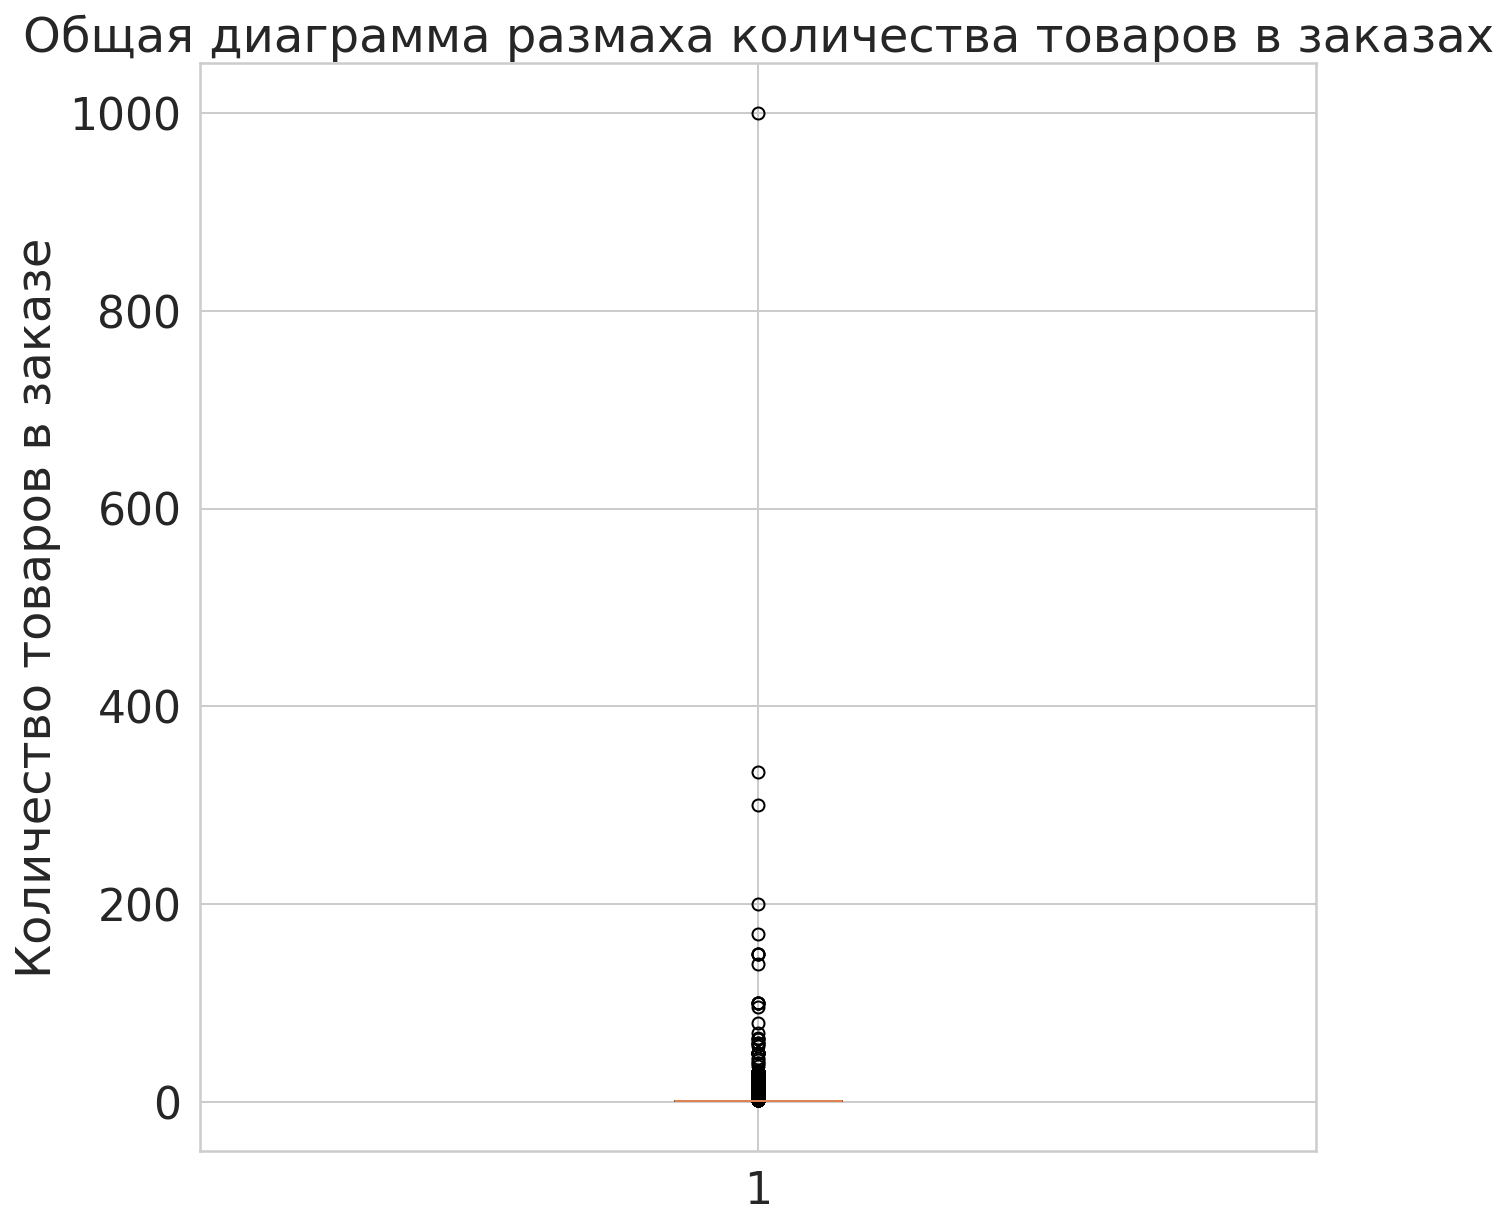

In [25]:
plt.figure(figsize=(10, 10))
plt.boxplot(df['quantity'])
plt.title("Общая диаграмма размаха количества товаров в заказах")
plt.ylabel("Количество товаров в заказе")
plt.show()

По графику видны явные выбросы в заказе.

Найдем "аномальное" количество товаров в заказе

In [26]:
anomaly = np.percentile(df['quantity'], 99)
anomaly

25.0

Если в заказе более 25 штук товара, значит эти заказы "аномальные" и их нужно удалить. 

In [27]:
df = df.query('quantity <= @anomaly')

In [28]:
len(df)

5467

Осталось 5467 строк, значит 55 строк(0,99%) было с аномально большим количеством заказанных товаров. 

Посмотрим на данные в столбце "quantity" после удаления выбрасов

In [29]:
df['quantity'].describe()

count   5,467.0000
mean        1.7212
std         2.5420
min         1.0000
25%         1.0000
50%         1.0000
75%         1.0000
max        25.0000
Name: quantity, dtype: float64

Построим новый боксплот уже с удаленными "выбросами" количества товаров в заказе, то есть от 1 до 25 товара в заказе. 

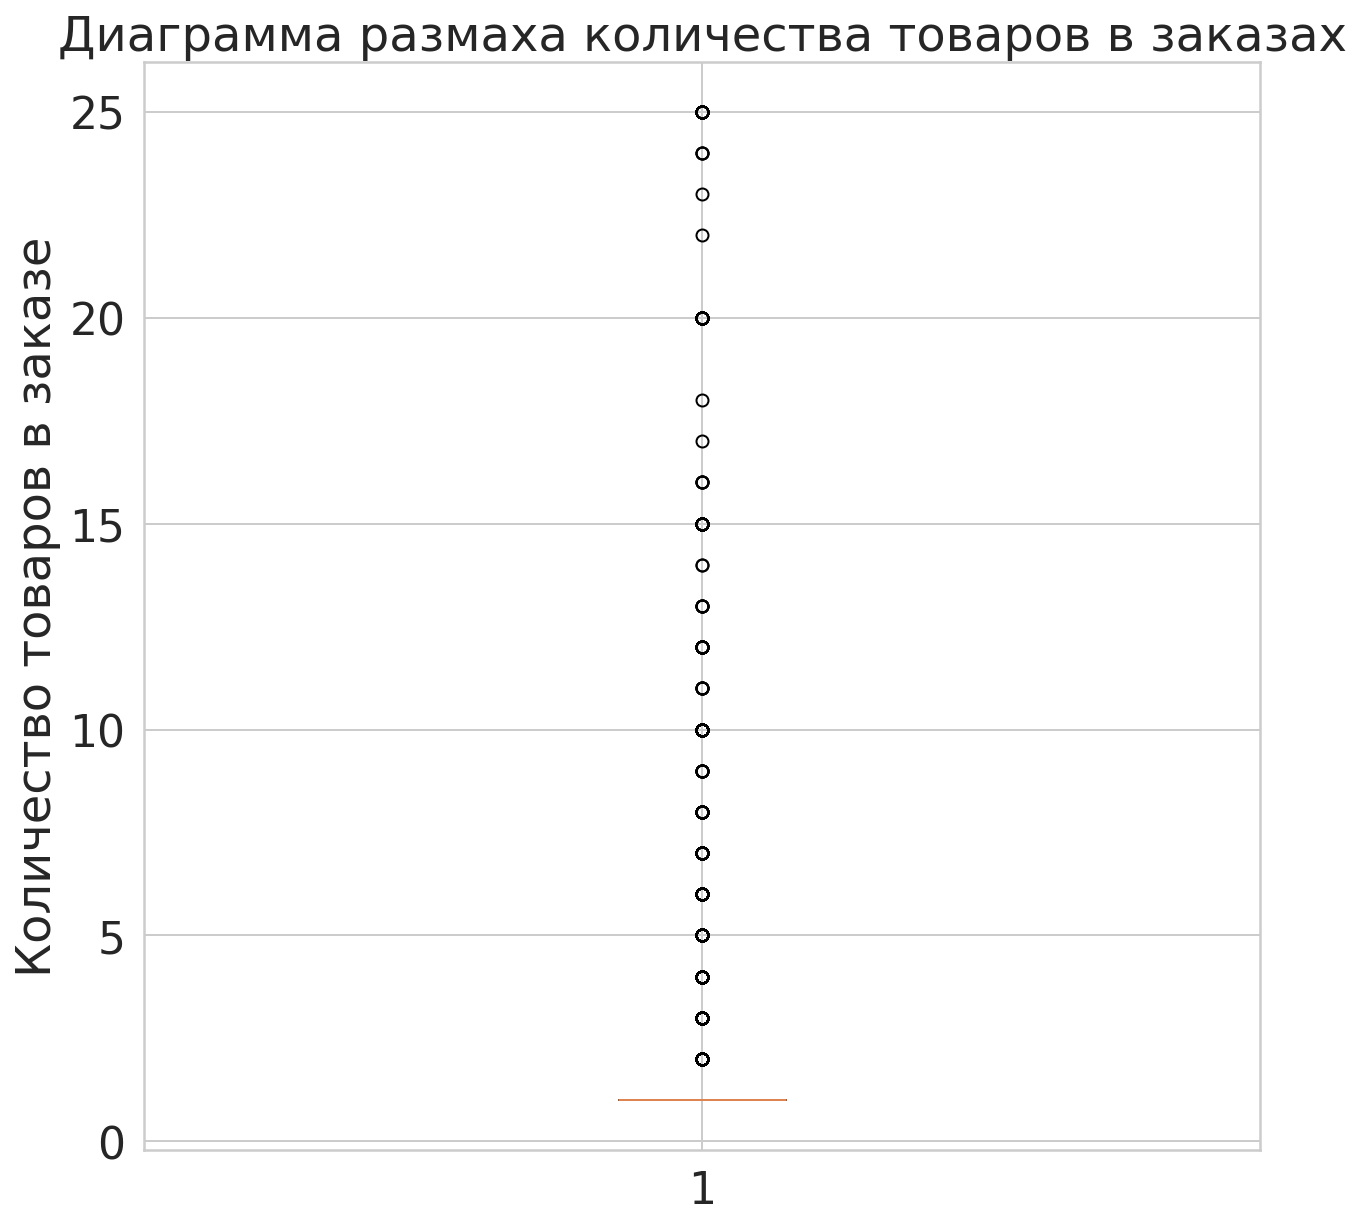

In [30]:
plt.figure(figsize=(10, 10))
plt.boxplot(df['quantity'])
plt.title("Диаграмма размаха количества товаров в заказах")
plt.ylabel("Количество товаров в заказе")
plt.show()

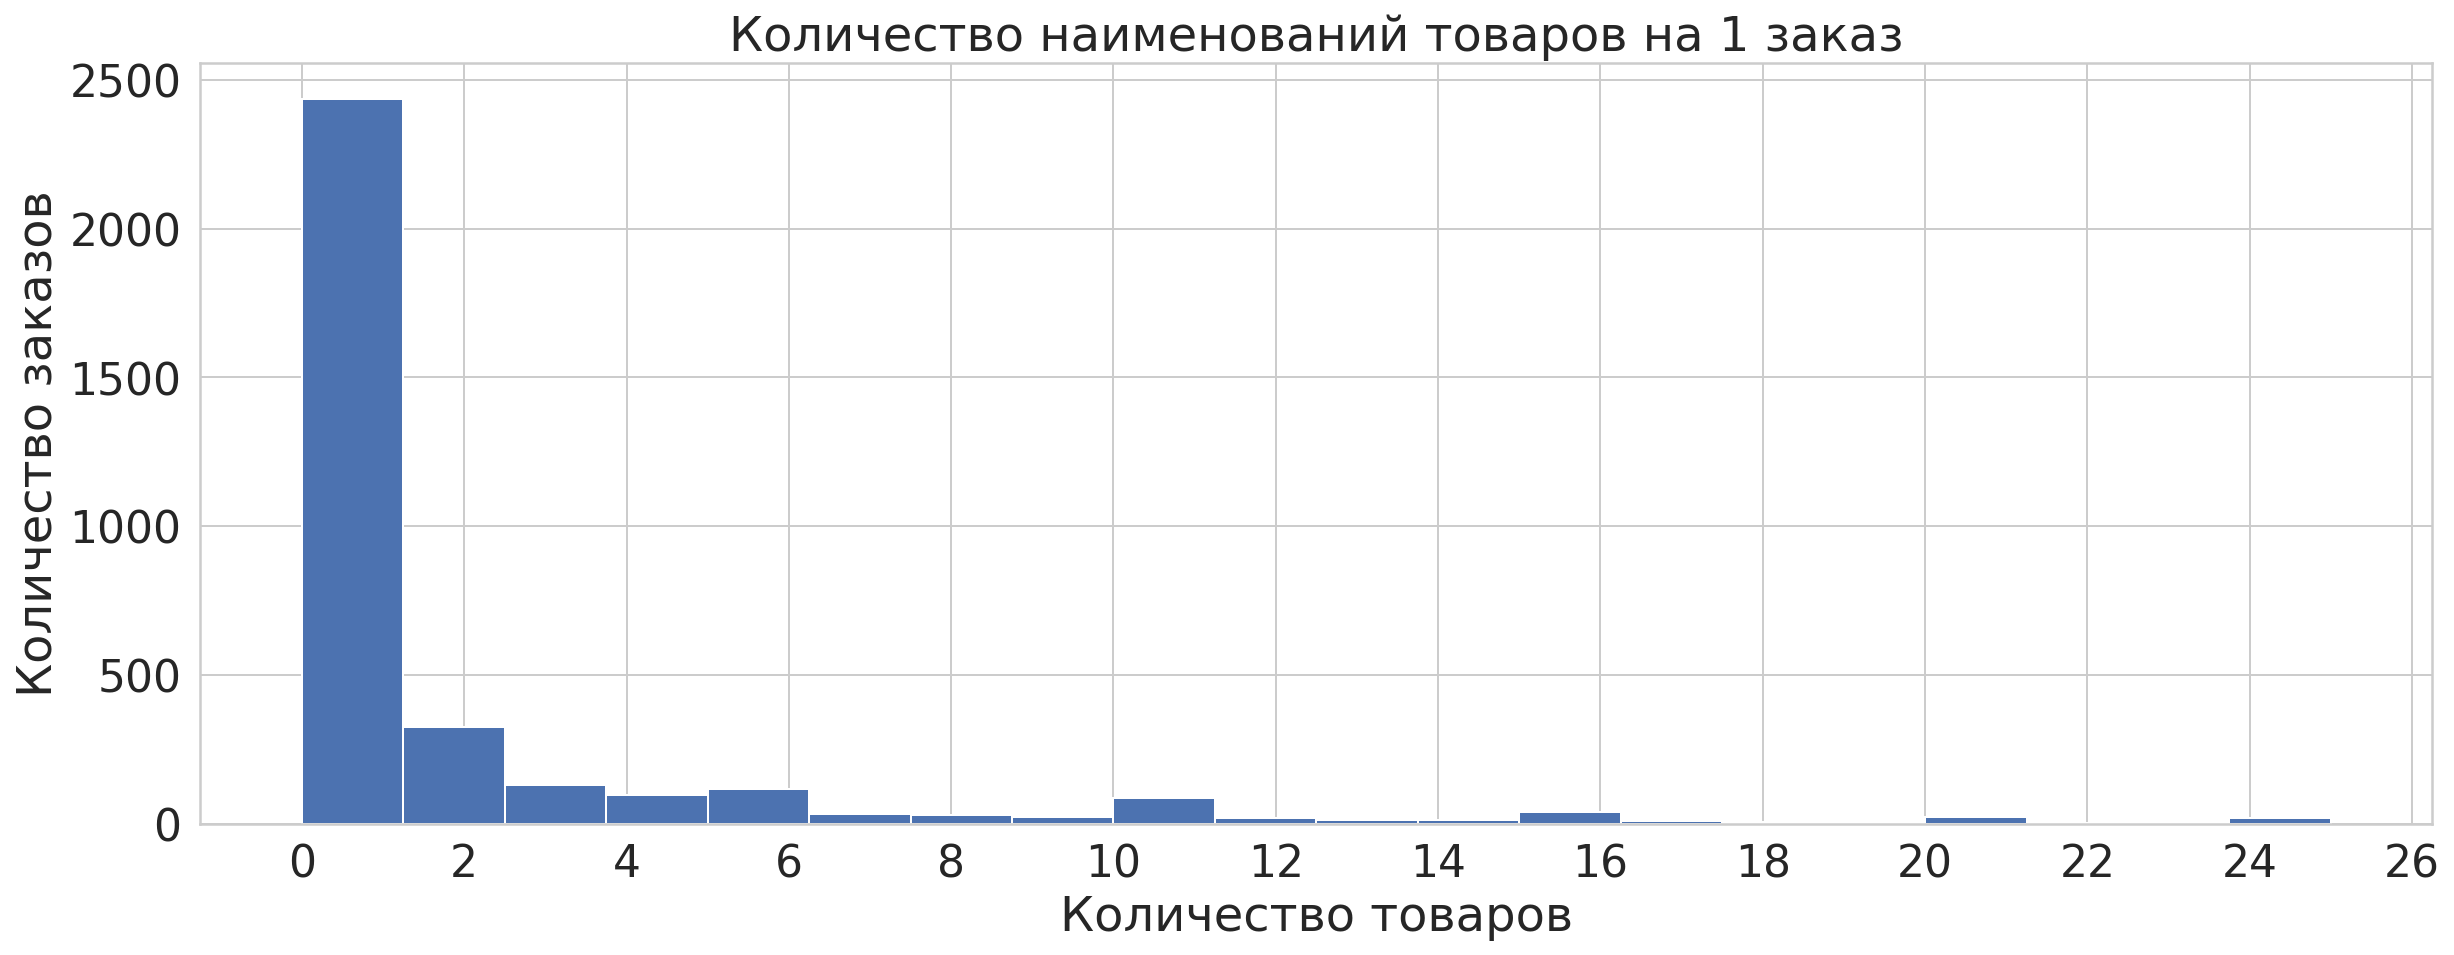

In [31]:
df.groupby('order_id').agg({'quantity': 'sum'}).hist(range=(0, 25), bins=20)
plt.title('Количество наименований товаров на 1 заказ')
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Количество товаров')
plt.ylabel('Количество заказов');

В описанных данных столбца "quantity" есть изменения. Изменилось стандартное отклонение (было 16, стало 2). Среднее значение теперь 1,7. Большая часть заказов состояла из 2 товаров.

###  Средняя и общая выручка покупателей в зависимости от количества заказов 

In [32]:
proceeds_customers = df.groupby('customer_id', as_index=False).agg({'order_id': 'nunique', 'proceeds': 'sum'})
proceeds_customers.query('order_id > 1').agg({'proceeds': ['sum', 'mean', 'median']})

proceeds
sum    1,813,722.9167
mean       2,087.1380
median     1,109.0000

In [33]:
proceeds_customers.query('order_id == 1').agg({'proceeds': ['sum', 'mean', 'median']})

proceeds
sum    1,769,954.5000
mean       1,179.1835
median       708.0000

Когда покупали 2 или более товаров, выручка составляла 1 813 722,91 у.е., средняя выручка при этом - 2 087,13 у.е. Когда покупали 1 товар, выручка была - 1 769 954,50 у.е., средняя выручка - 1 179,18 у.е.

### Динамика общей выручки по месяцам 

In [34]:
df['proceeds'].describe()

count    5,467.0000
mean       655.5108
std      1,204.4540
min          9.0000
25%        120.0000
50%        188.0000
75%        712.0000
max     24,370.0000
Name: proceeds, dtype: float64

Виден большой разброс в выручке (стандартное отклонение 1 204,45 у.е.), так же видна разница между средним значением (655,51 у.е.) и медианным (188,00 у.е.). Это может быть связано с "выбросами".

Построим общий боксплот размаха выручки.

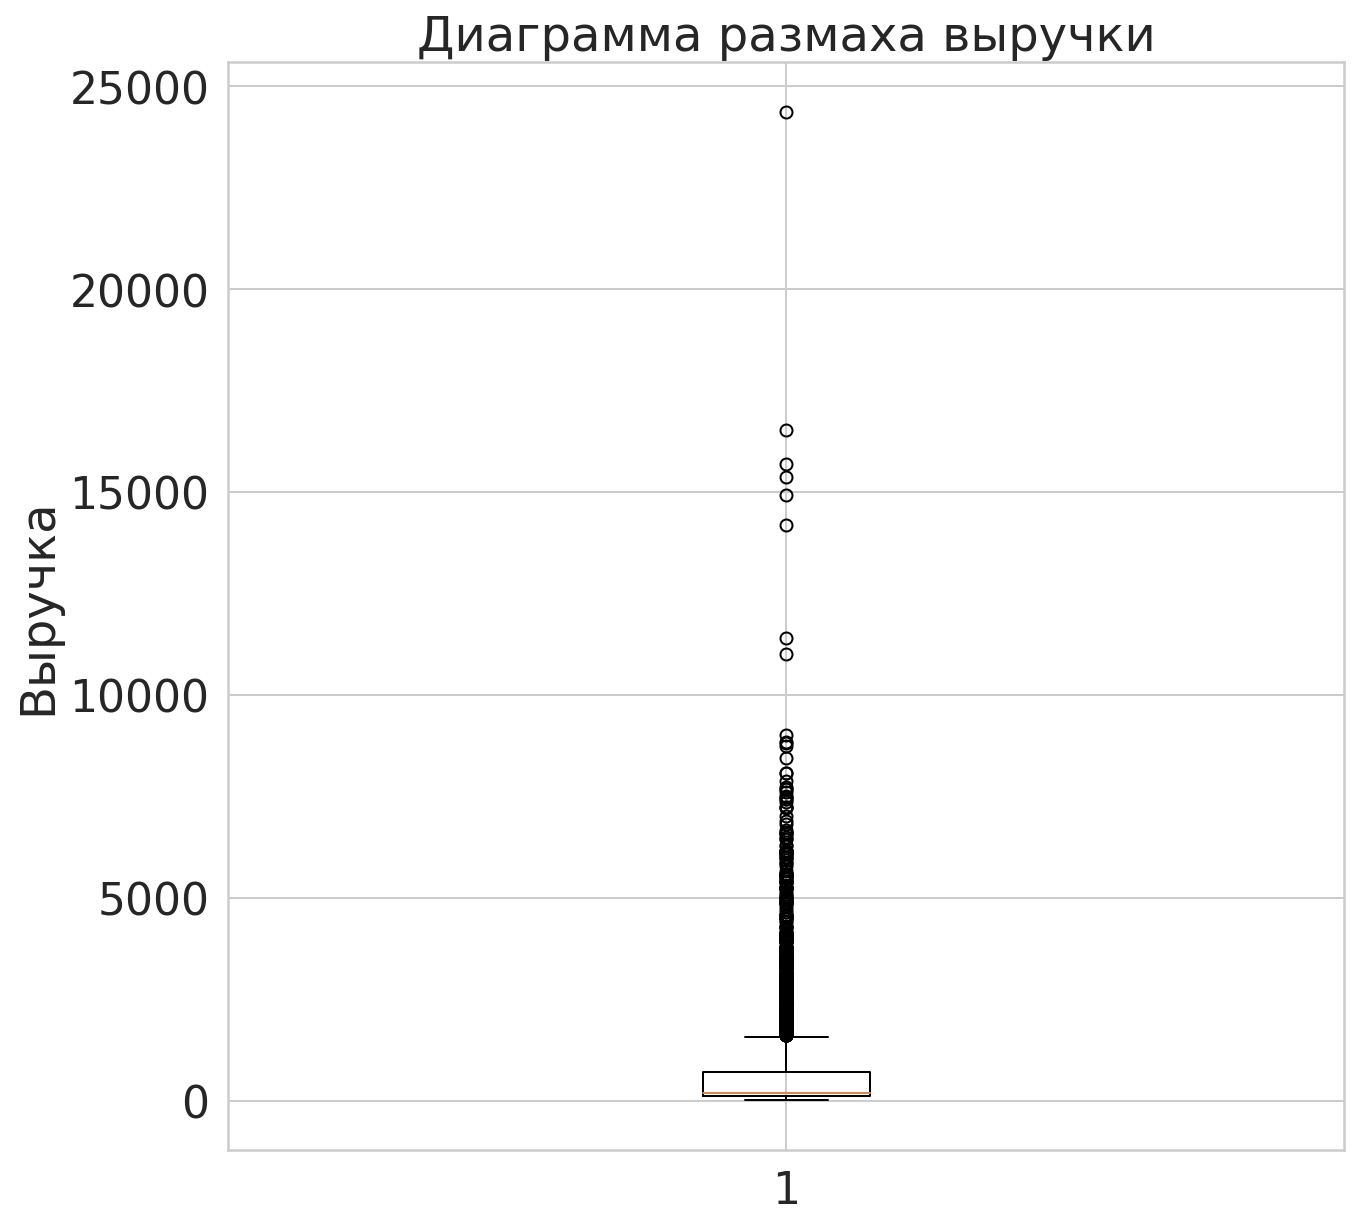

In [35]:
plt.figure(figsize=(10, 10))
plt.boxplot(df['proceeds'])
plt.title("Диаграмма размаха выручки")
plt.ylabel("Выручка")
plt.show()

Найдем "аномальное" значение для выручки

In [36]:
anomaly_proceeds = np.percentile(df['proceeds'], 99)
anomaly_proceeds

5878.940000000013

Если выручка выходит больше 5 878 у.е., значит эти заказы "аномальные" и их нужно удалить. 

In [37]:
df = df.query('proceeds <= @anomaly_proceeds')

In [38]:
len(df)

5412

Осталась 5412 строка, 55 строк были "аномальными", мы их удалили.

In [39]:
df['proceeds'].describe()

count   5,412.0000
mean      578.7150
std       871.9308
min         9.0000
25%       119.5000
50%       188.0000
75%       674.0000
max     5,848.0000
Name: proceeds, dtype: float64

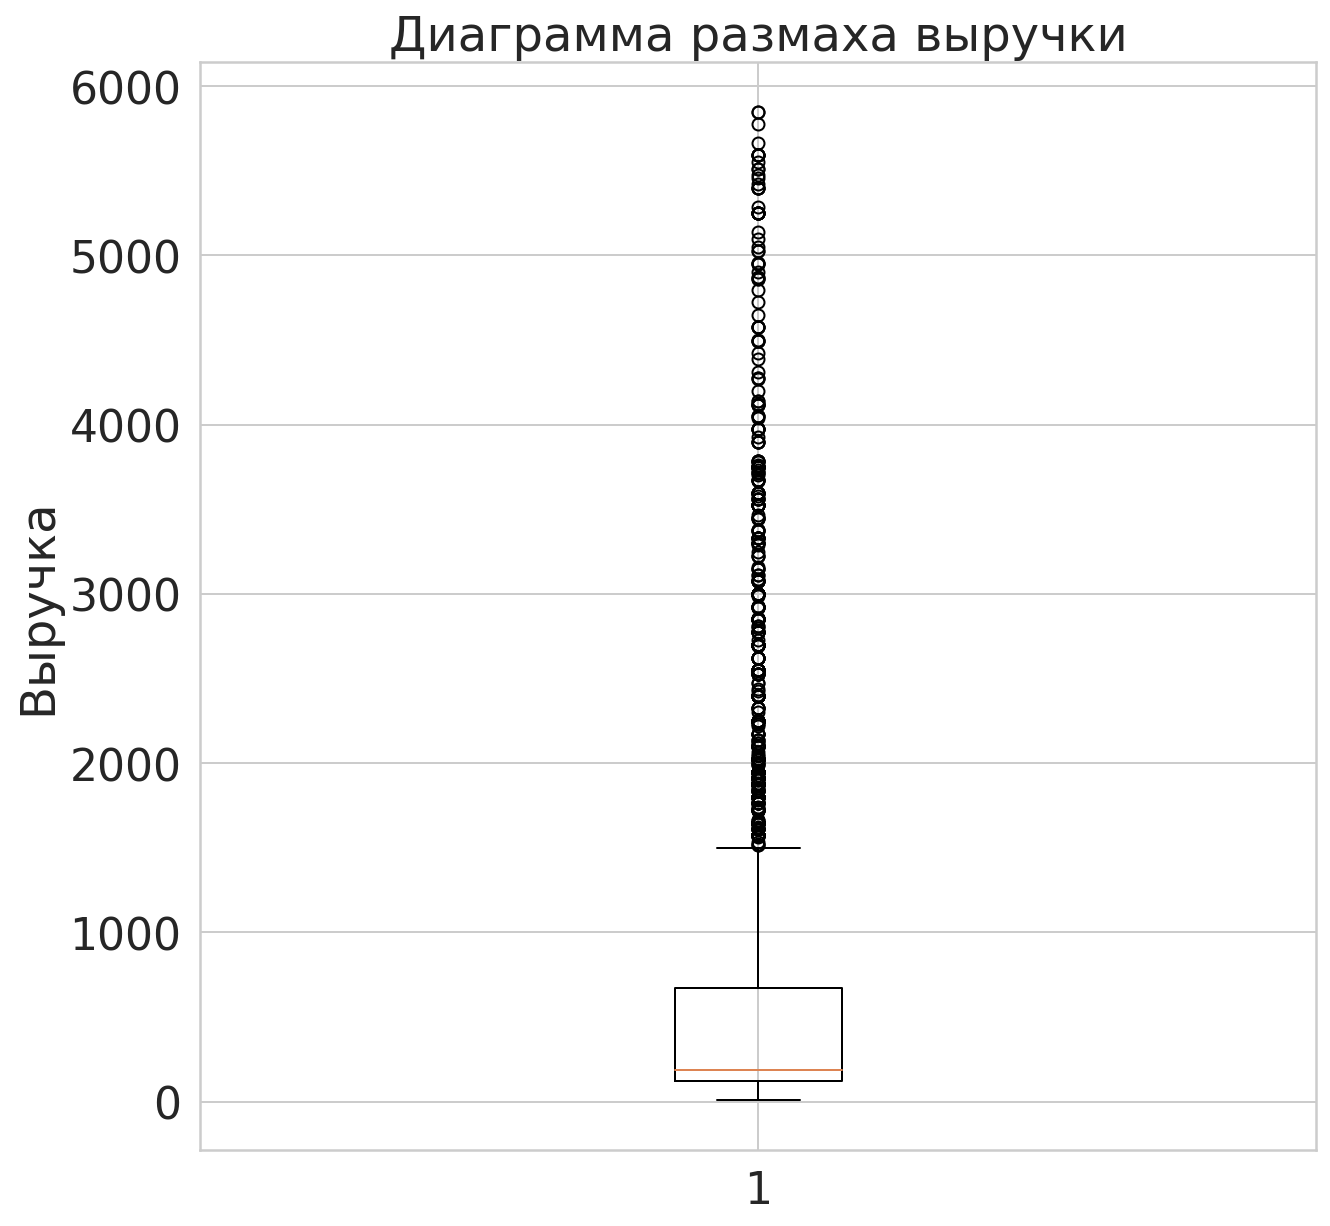

In [40]:
plt.figure(figsize=(10, 10))
plt.boxplot(df['proceeds'])
plt.title("Диаграмма размаха выручки")
plt.ylabel("Выручка")
plt.show()

После удаления "аномалий" в выручке можно увидеть изменения в стандартном отклонении (было 1 204, стало 872). Изменилось среднее значение (было 655, стало 578). Медиана не изменилась - 188.

**Строим график изменений общей выручки по месяцам**

In [41]:
df.groupby(['month']).agg({'proceeds': 'sum'})

proceeds
month               
2018-10 314,456.0000
2018-11 255,921.0000
2018-12 268,097.0000
2019-01 164,142.0000
2019-02 245,378.0000
2019-03 233,451.0000
2019-04 228,279.0000
2019-05 187,441.0000
2019-06 135,519.0000
2019-07 176,609.0000
2019-08 158,302.0000
2019-09 162,266.0000
2019-10 166,559.0000
2019-11 102,076.7500
2019-12 174,778.3333
2020-01 158,730.3333

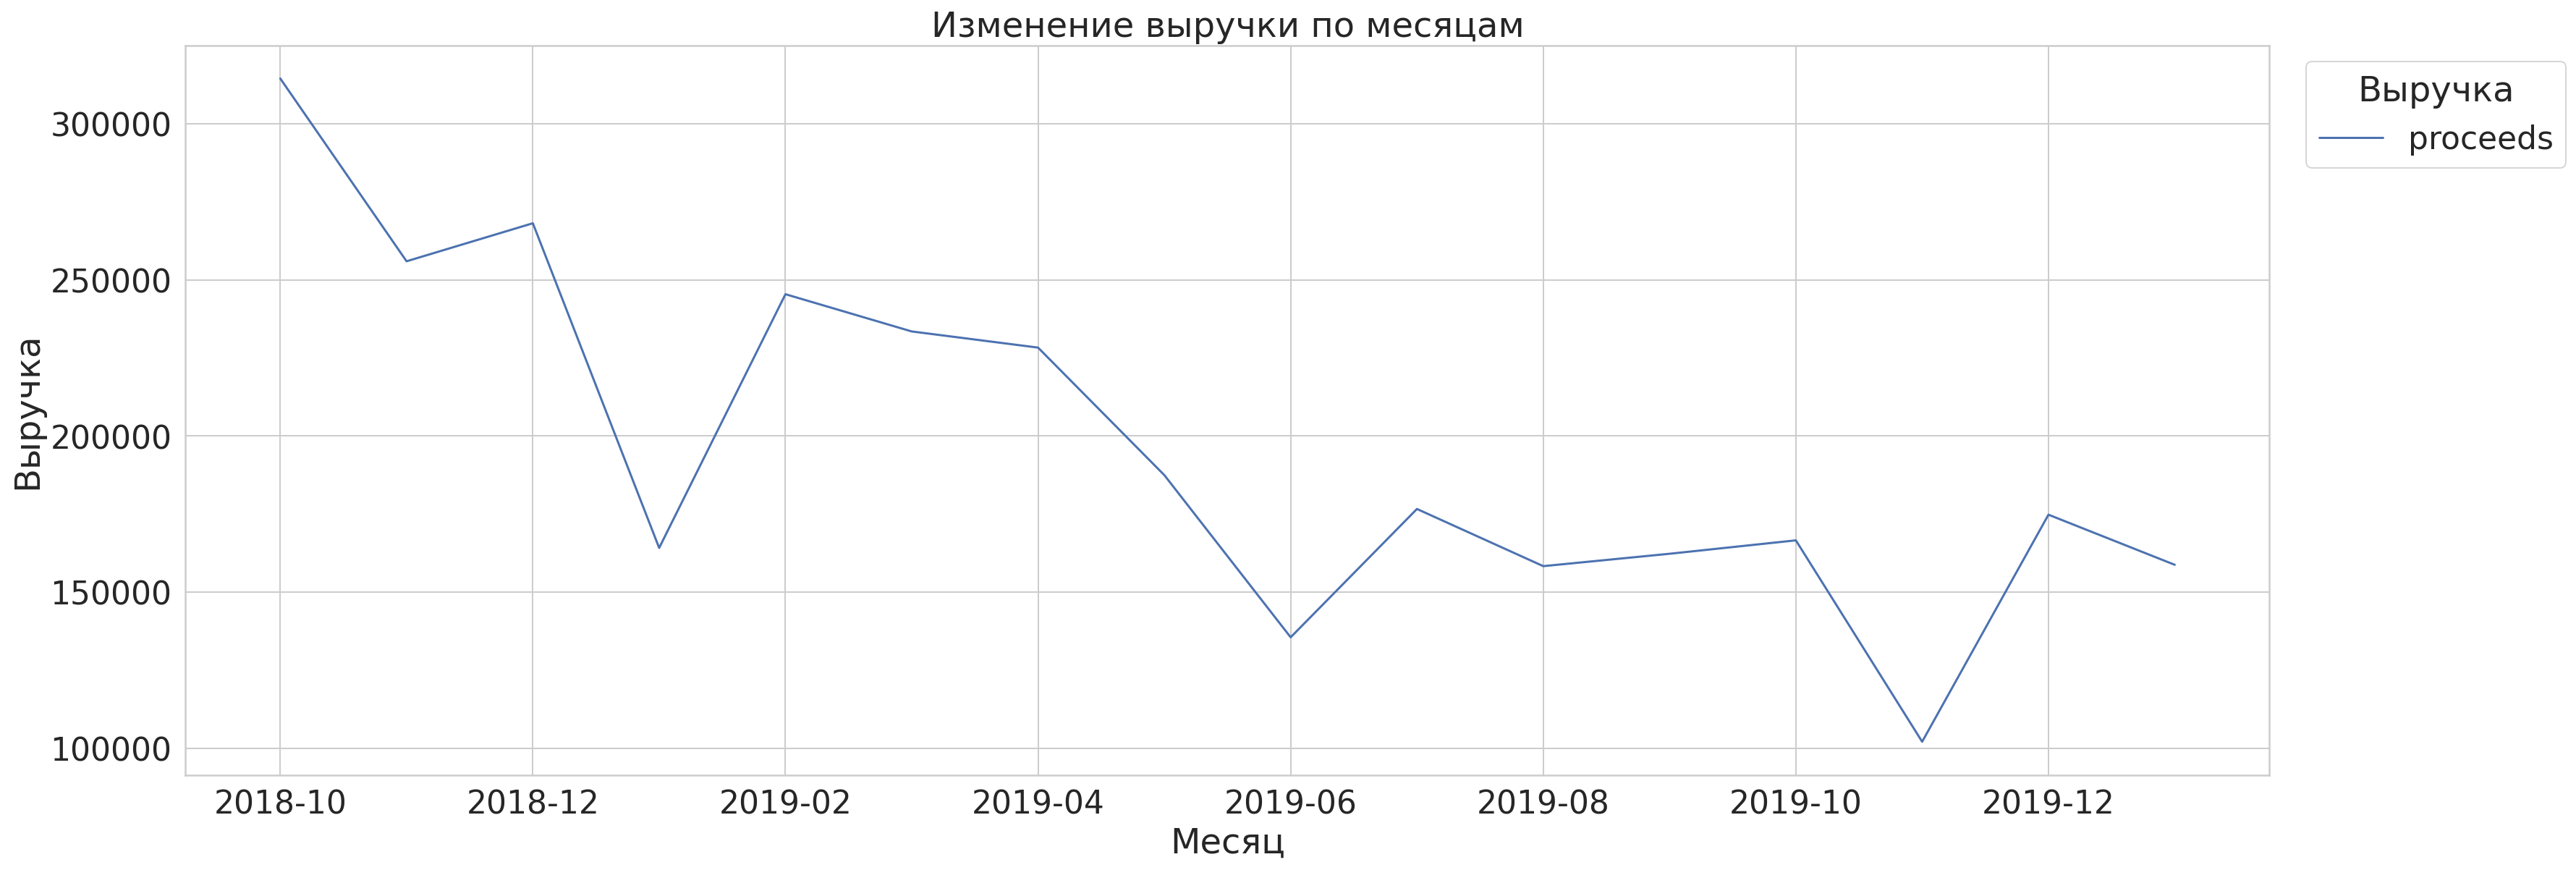

In [42]:
df.groupby(['month']).agg({'proceeds': 'sum'}) \
      .plot(grid=True)
plt.title('Изменение выручки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.legend(title='Выручка', bbox_to_anchor=(1.15, 1.0));

После удаления "аномальных" значений в количестве товаров изменилась и выручка. На графике есть большой спад выручки в январе 2019 года, затем к весне выручка начинает расти, значит и спрос к товарам тоже. К осени опять видим значительный спад.

### Динамика среднего чека покупателя по месяцам

In [43]:
check = df.groupby(['month']).agg({'proceeds':'sum','order_id':'nunique'}).reset_index()
check['check'] = check['proceeds'] / check['order_id']
check

month     proceeds  order_id      check
0   2018-10 314,456.0000       229 1,373.1703
1   2018-11 255,921.0000       196 1,305.7194
2   2018-12 268,097.0000       267 1,004.1086
3   2019-01 164,142.0000       161 1,019.5155
4   2019-02 245,378.0000       277   885.8412
5   2019-03 233,451.0000       237   985.0253
6   2019-04 228,279.0000       253   902.2885
7   2019-05 187,441.0000       167 1,122.4012
8   2019-06 135,519.0000       151   897.4768
9   2019-07 176,609.0000       191   924.6545
10  2019-08 158,302.0000       170   931.1882
11  2019-09 162,266.0000       175   927.2343
12  2019-10 166,559.0000       193   863.0000
13  2019-11 102,076.7500       213   479.2336
14  2019-12 174,778.3333       243   719.2524
15  2020-01 158,730.3333       267   594.4956

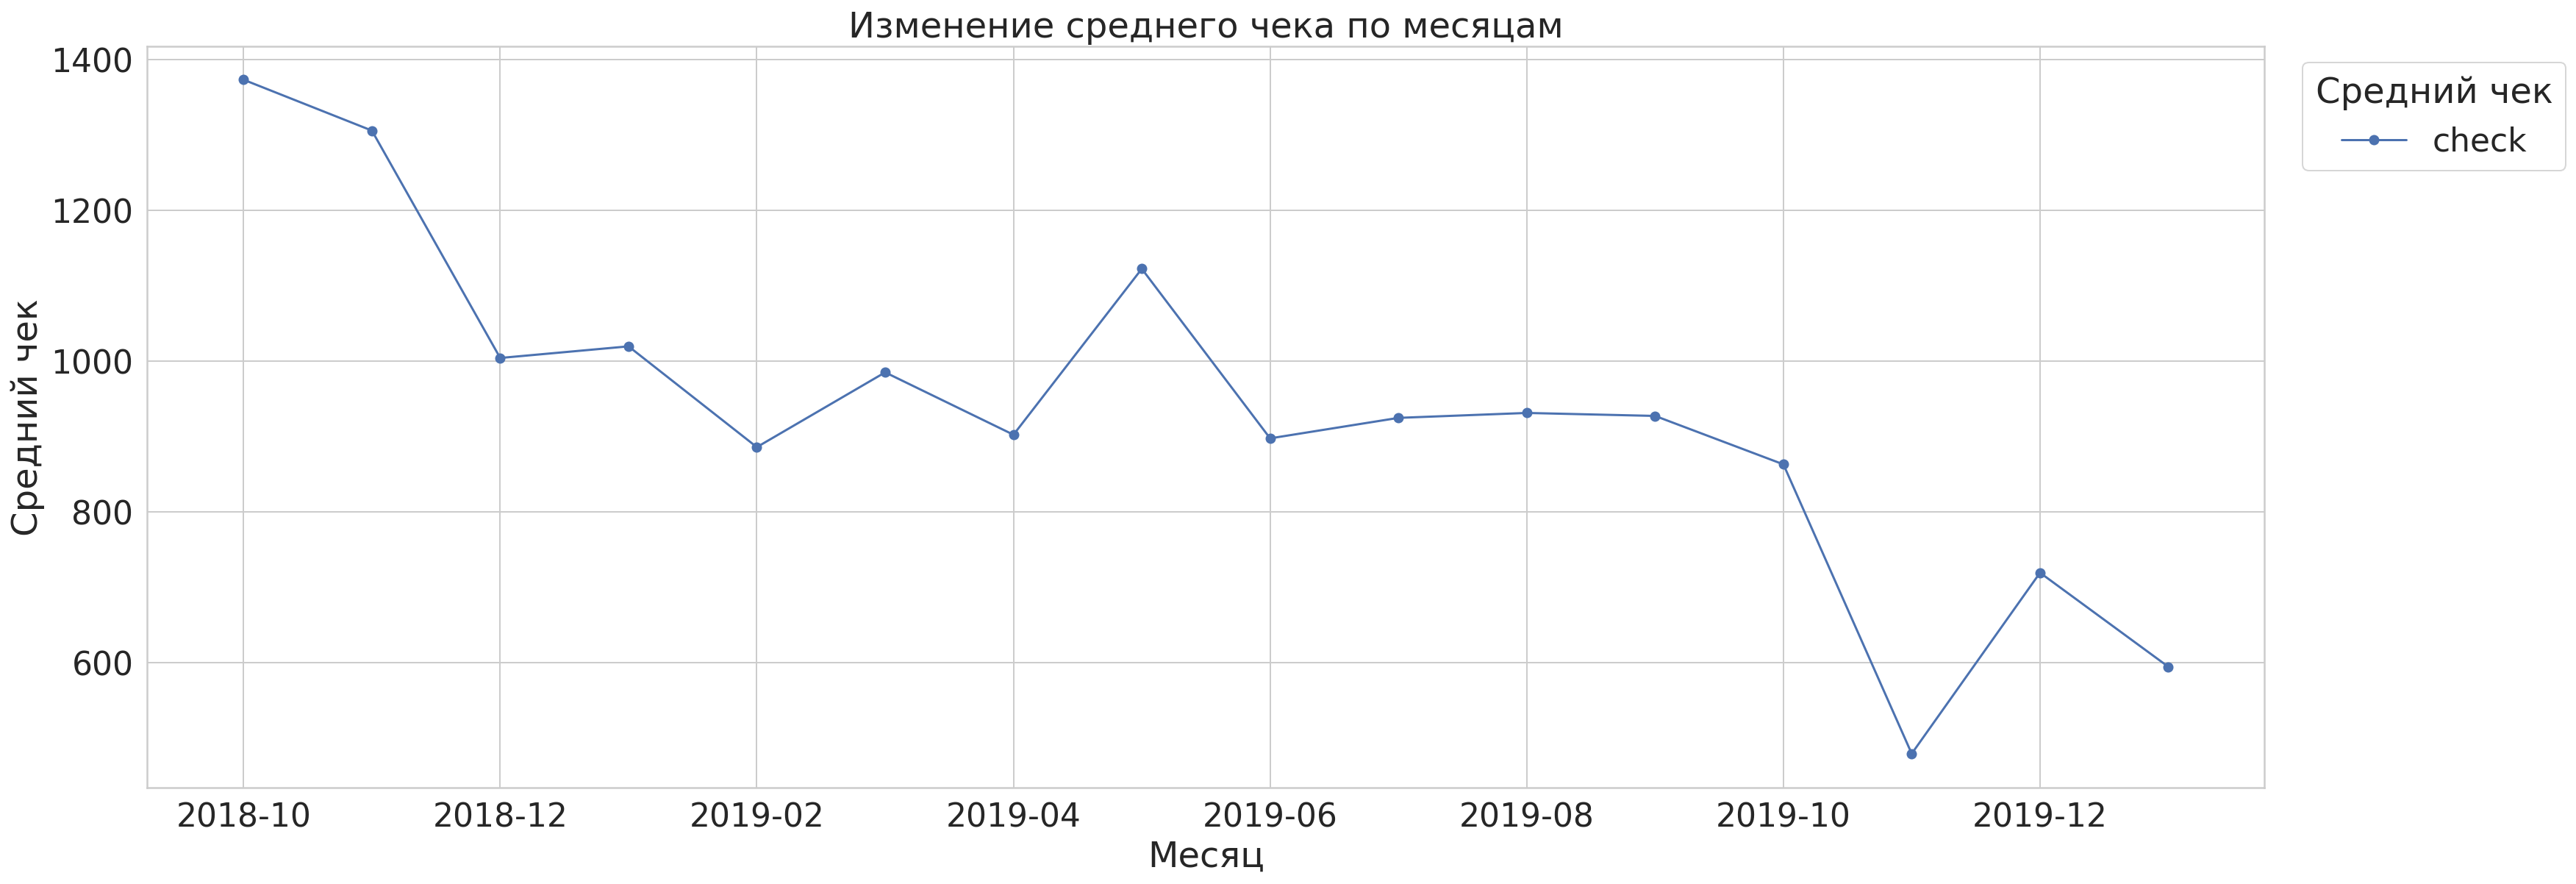

In [44]:
check.plot(marker='o', x='month', y='check', grid=True)
plt.title('Изменение среднего чека по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средний чек')
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.legend(title='Средний чек', bbox_to_anchor=(1.15, 1.0));

Средний чек также рос весной, в мае 2019 года был пик 1 122,40 у.е. Осенью начался спад среднего чека.

**Вывод**

Рассмотрев статистические показатели датасета с транзакциями мы выяснили, что заказы были сделаны **с 1 октября 2018 года по 31 октября 2019 года.** За весь период заказы совершали **2 413 покупателей**. Количество **заказов составило 3 492**. Также было **продано 2 332 товара**. 

При дальнейшем изучении данных были выявлены "выбросы" в количествах товара. Эти "аномалии" возможно были связаны с юридическими лицами, то есть заказы были сделаны не для личного пользования. Поэтому было решено их удалить, что бы они не мешали в дальнейшем исследовании. Так как такие покупатели требуют другого подхода и рекомендации.

Когда покупали 2 или более товаров, выручка составляла 1 813 722,91 у.е., средняя выручка при этом - 2 087,13 у.е. Когда покупали 1 товар, выручка была - 1 769 954,50 у.е., средняя выручка - 1 179,18 у.е.





## Сегментация покупателей на основе историй их покупок

### Категоризация товара

После удаления дубликатов и "аномалий" посмотрим уникальные товаровы

In [45]:
product = df['product'].unique()
product

array(['комнатное растение в горшке алое вера, d12, h30',
       'комнатное растение в горшке кофе арабика, d12, h25',
       'радермахера d-12 см h-20 см', ...,
       'сумка-тележка хозяйственная rolser bab010 rojo joy-1800 красная',
       'кружка с трубочкой attribute мяч 500 мл jar501',
       'искусственный цветок подснежник садовый пластиковый белый'],
      dtype=object)

Лемматизация по списку уникальных товаров

In [46]:
m = Mystem()
string = '; '.join(product)
lemmas = m.lemmatize(string)
goods = Counter(lemmas).most_common()

Посмотрим какие слова и символы встречались в товарах по убыванию их количества

In [47]:
for i in range(0,len(goods)): 
    print(goods[i]) 

(' ', 14962)
('; ', 2277)
('см', 1041)
(', ', 1038)
('-', 937)
('для', 535)
(',', 292)
('в', 272)
('d', 257)
('л', 251)
('с', 243)
('рассада', 221)
('5', 188)
('сорт', 171)
('кассета', 170)
(' (', 170)
('белый', 168)
('шт', 167)
('0', 161)
('12', 144)
('красный', 142)
('белье', 140)
(') ', 139)
('горшок', 130)
('/', 130)
('доска', 129)
('9', 123)
('цветок', 117)
('сушилка', 115)
('объем', 114)
('гладильный', 110)
('6', 110)
('1', 107)
('2', 104)
('4', 101)
('по', 100)
('томат', 100)
('10', 99)
('. ', 97)
('диам', 95)
('тележка', 93)
('помидор', 93)
('№', 88)
('пеларгония', 86)
('*', 85)
('розовый', 84)
('сумка', 83)
('3', 82)
('из', 81)
('и', 79)
('luminarc', 76)
('gimi', 74)
('7', 74)
('ника', 74)
('среднеспелый', 73)
('коврик', 72)
('ванный', 72)
('кухня', 71)
('20', 70)
('зелень', 68)
('муляж', 68)
('роза', 68)
('черный', 66)
('мл', 66)
('хозяйственный', 62)
('махровый', 62)
('г', 61)
('зональный', 61)
('чехол', 60)
('h', 59)
('пластмассовый', 59)
('искусственный', 59)
('синий', 58)

Рассортируем товары по разным категориям

In [48]:
decor = ['муляж', 'искусственн', 'искуственн', 'подушка', 'коврик', 'простын', 'покрывало', 'фоторамка', 'ковер', 'ковёр', 
         'плед', 'штор', 'пододеяльник', 'пододеяльник', 'наматрицник', 'наматрасник', 'одеяло', 'наволочка', 'светильник', 
         'постельн', 'сервир', 'картина', 'аромат', 'текст', 'трава', 'декор', 'ажурн']

kitchen_products = ['вилка', 'ложка', 'контейнер', 'нож', 'кувшин', 'салфет', 'овощ', 'чайник'
           , 'просеиватель', 'кух', 'банка', 'стакан', 'кастрюля', 'чайный', 'кружка', 'сковород', 'тарелка'
           , 'противень', 'дуршлаг', 'термос', 'рыбочистка', 'толкушка', 'лопатка', 'скатерть', 'ковш'
           , 'выпечк', 'пресс', 'миксер', 'масленка', 'мантоварка', 'анти', 'картофелемялка', 'миска'
           , 'хлебница', 'терка', 'крышка', 'рассекатель', 'кондитерский', 'пищев', 'котел', 'электроштопор'
           , 'салатник', 'скребок', 'весы', 'посудом', 'раздел', 'столов', 'бокал', 'фужер', 'сковорода', 'чай'
           , 'мука', 'буль', 'плит', 'свч', 'франция', 'обед', 'эмал', 'шоколад', 'суп']

bathroom_products = ['ёрш', 'ерш', 'ванн', 'полотен', 'вантуз', 'мыло', 'фен', 'дозатор', 'халат'
            , 'подголовник', 'зуб', 'унитазный', 'таз']

household_goods = ['обув', 'вешал', 'комод', 'костюм', 'ящик', 'кофр', 'плечики', 'коробка'
            , 'подставка', 'лоток', 'корзинка', 'ключница', 'урна', 'болт', 'крючок', 'стремянк', 'петля'
            , 'инструмент', 'шнур', 'сварка', 'бензин', 'строительн'
            , 'сверло', 'термометр', 'короб', 'линейка', 'угольник', 'уголок', 'фиксатор', 'сушилка', 'корыто'
            , 'щетка', 'щётка', 'ведро', 'пылесос', 'микрофибр', 'швабра', 'налета'
            , 'прищеп', 'гладильн', 'подрукавник', 'корзина', 'насадка'
            , 'губка', 'утюг', 'подкладка', 'отжим', 'стирк'
            , 'отбеливатель', 'совок', 'стиральн', 'пластмассов', 'сметка', 'алюминиев', 'чистк', 'доска', 'белье', 'напол'
            , 'пятно', 'окно', 'чехол', 'полиурет', 'багаж', 'груз' , 'каркас', 'двер', 'сталь', 'люкс', 'покрытие', 'виолета'
            , 'пвх', 'склад', 'ступень', 'поролон', 'стекл', 'упаков', 'карниз', 'универ', 'мытье', 'резин', 'перчат']

Создадим функцию, которая по ключевым словам отнесет товары в разные категории

In [49]:
def category_product(product_name):
    if any(i in product_name.lower() for i in decor):
        return 'Декор'
    elif any(i in product_name.lower() for i in kitchen_products):
        return 'Товары для кухни'
    elif any(i in product_name.lower() for i in bathroom_products):
        return 'Товары для ванны'
    elif any(i in product_name.lower() for i in household_goods):
        return 'Хоз.товары'
    else:
        return 'Сад'

In [50]:
df['product_category'] = df['product'].apply(category_product)

In [51]:
category_count = df.groupby(['product', 'product_category'])[['order_id']].nunique().reset_index().groupby('product_category', as_index=False)['product'].count().sort_values('product', ascending=False)
category_count

product_category  product
1               Сад      907
4        Хоз.товары      519
3  Товары для кухни      461
0             Декор      303
2  Товары для ванны       92

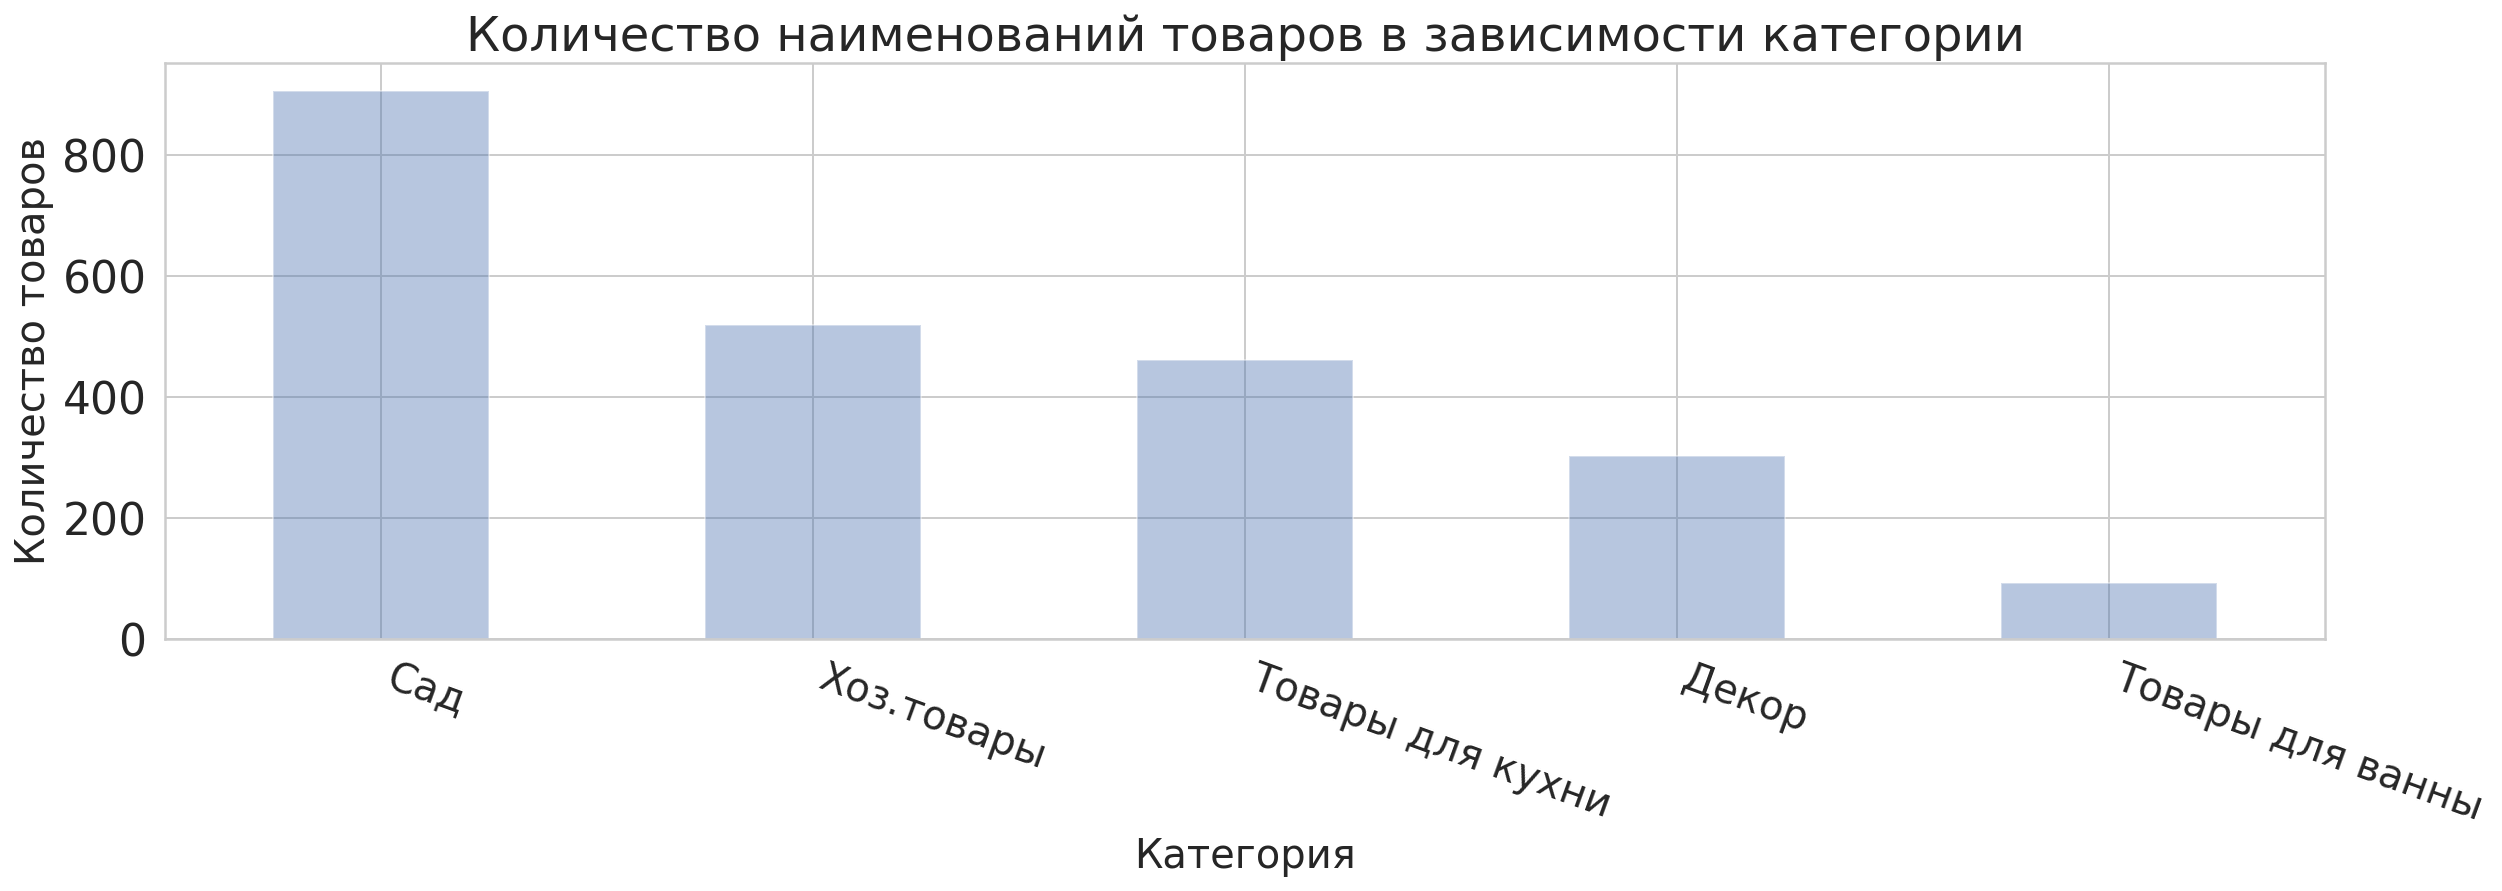

In [52]:
category_count.plot(x='product_category', y='product', kind='bar', figsize=(15, 4), legend=False, alpha=.4)
plt.title("Количество наименований товаров в зависимости категории")
plt.xlabel("Категория", size=20)
plt.ylabel("Количество товаров", size=20) 
plt.xticks(rotation=-20, ha='left', size=20)
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.show()

Через лемматизацию мы выделили 5 основных категории товаров:

* Сад

* Хоз.товары

* Товары для кухни

* Декор

* Товары для ванны

Наибольшее количество товаров оказалось в разделе "Сад" - 907 товаров. Далее идут "Хоз.товары", их 519. Меньше всего товаров в разделе "Товары для ванны" - 92 товара.

Построим график с изменением выручки по месяцам во всех категориях

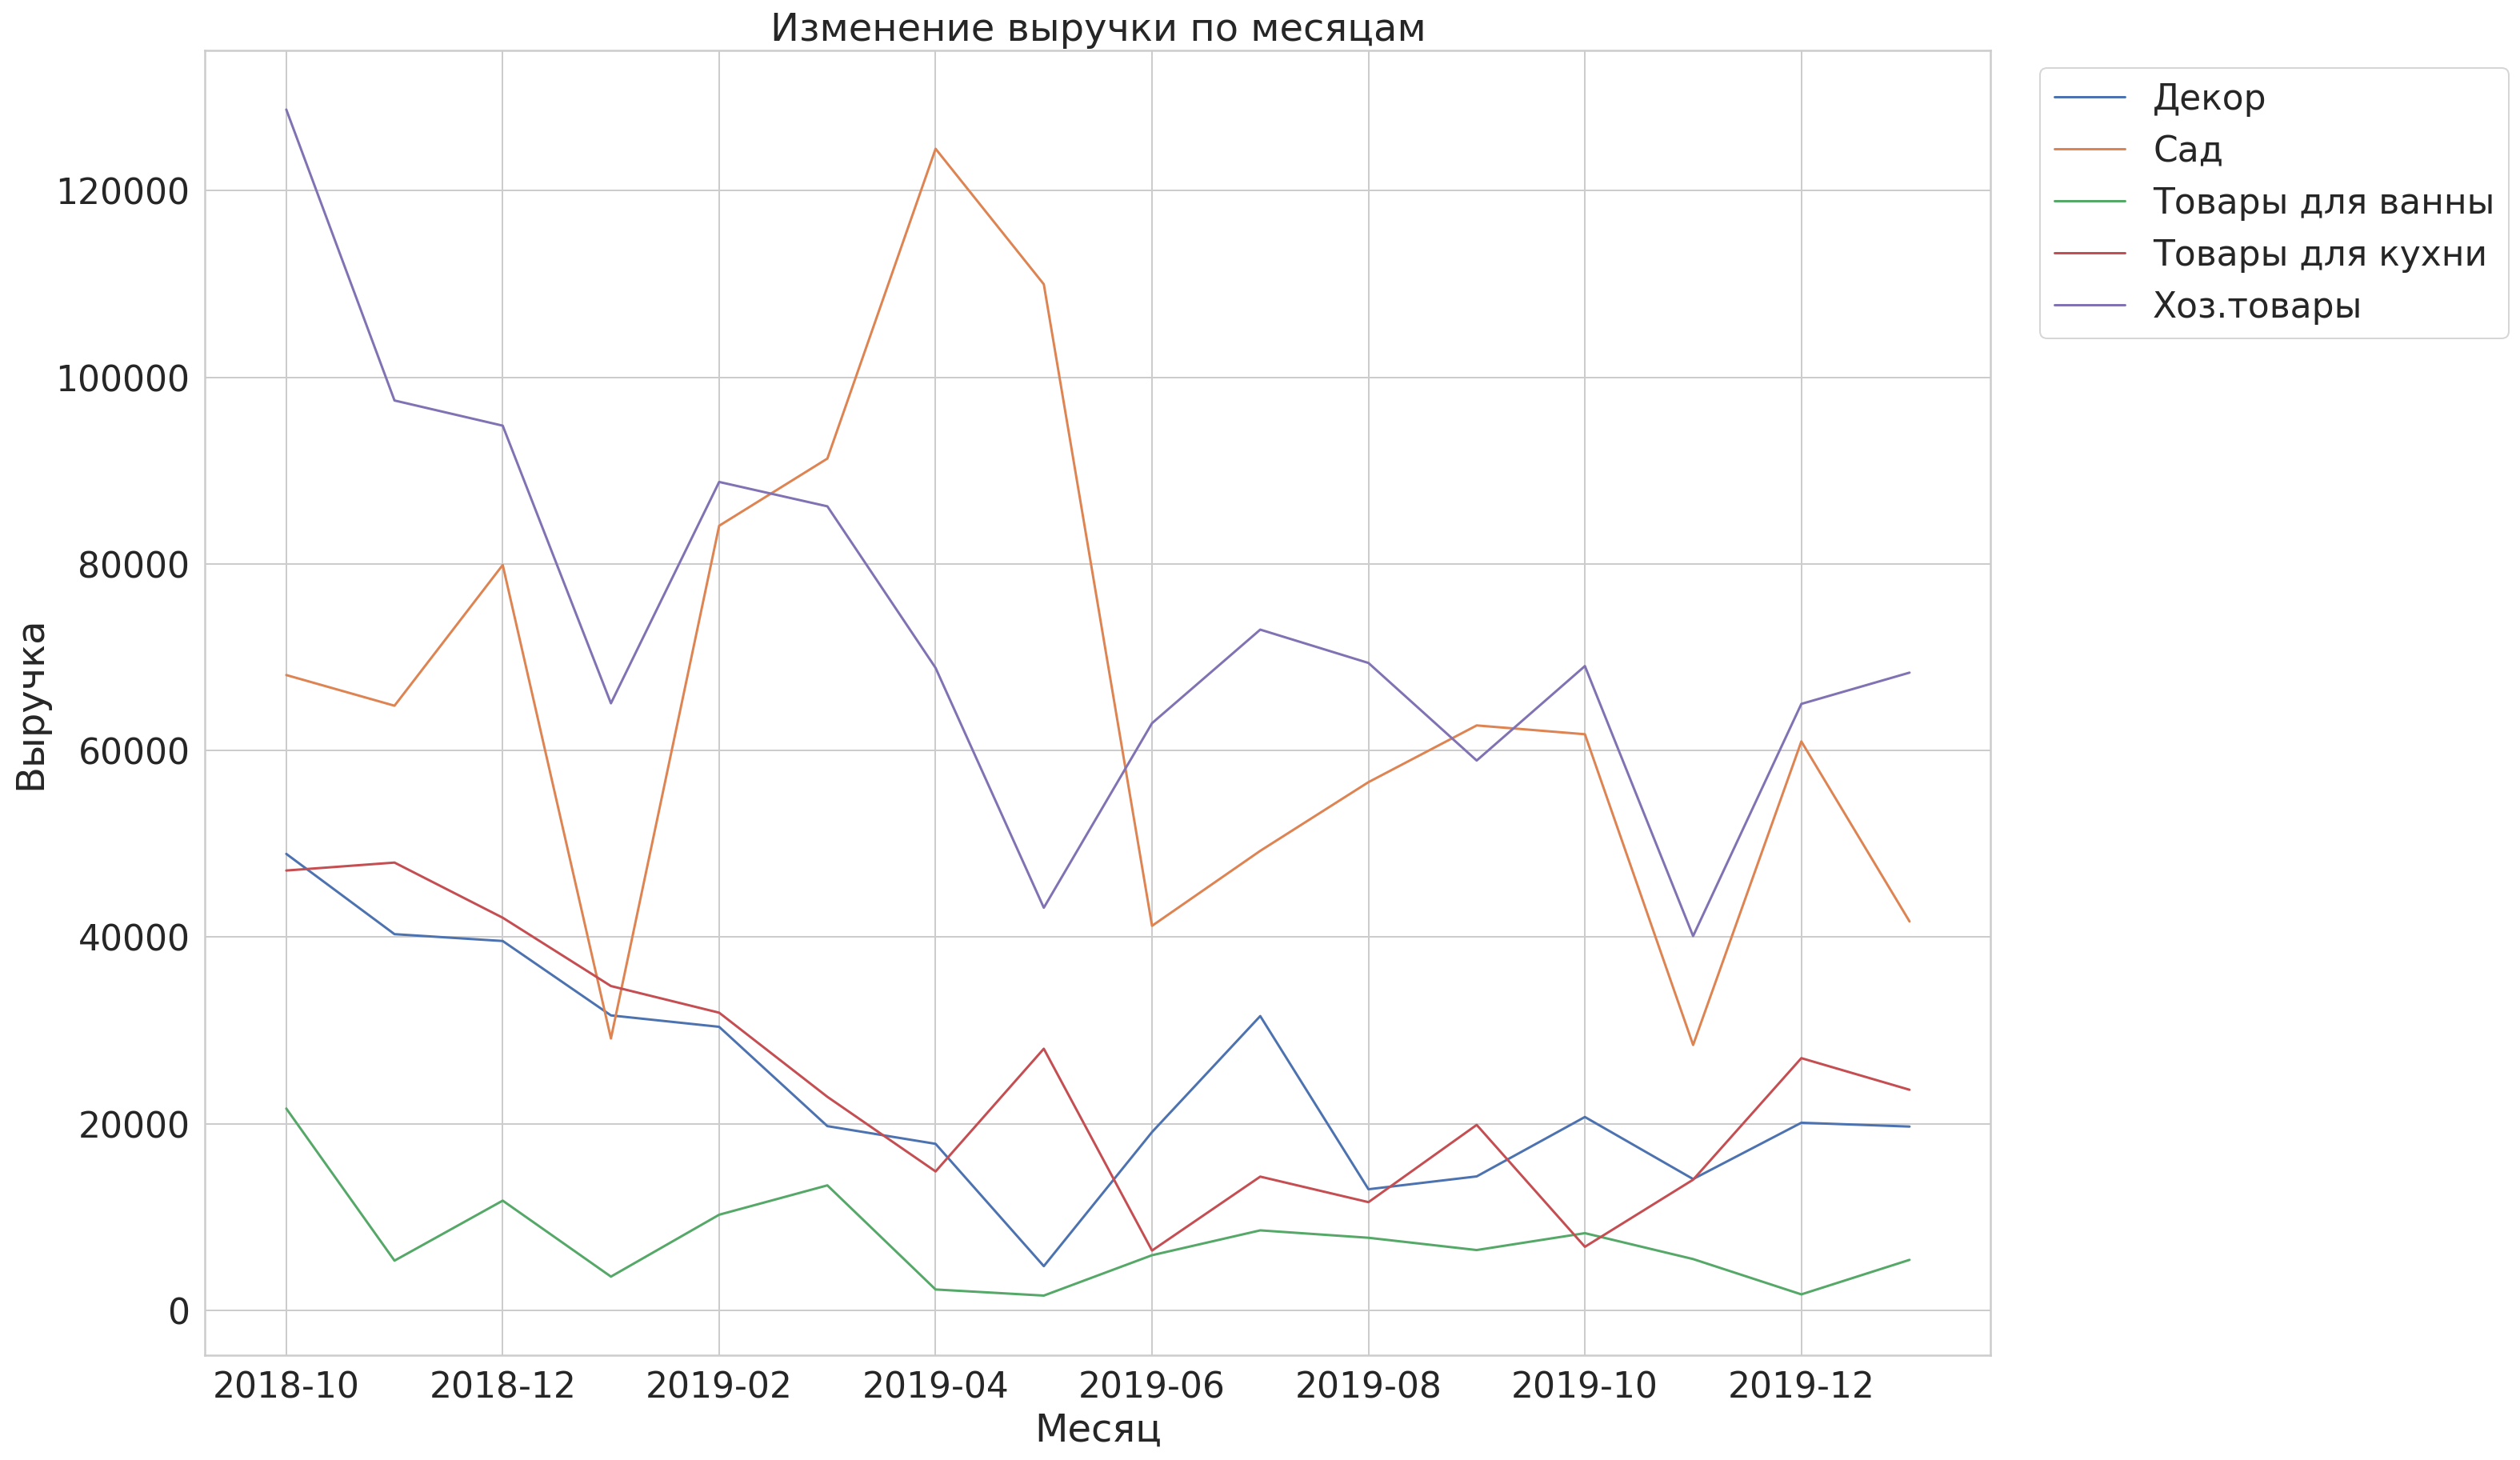

In [53]:
df.pivot_table(
    index='month', 
    columns='product_category',  
    values='proceeds',  
    aggfunc='sum',  
).plot(figsize=(20, 15), grid=True)

plt.title('Изменение выручки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.legend(loc='best', bbox_to_anchor=(1.3, 1.0))
plt.show()


По графику видно, есть спад в категорий "Сад" в январе и в ноябре, а подъем в апреле. Это говорит о сезонности товара.

### Кластеризация покупателей

Рассмотрим количество заказов у покупателей.

In [54]:
segment_customer = df.groupby('customer_id').agg({'order_id': 'count'})
segment_customer.columns = ['order_count']
segment_customer.head()

order_count
customer_id                                      
000d6849-084e-4d9f-ac03-37174eaf60c4            4
001cee7f-0b29-4716-b202-0042213ab038            1
00299f34-5385-4d13-9aea-c80b81658e1b            1
002d4d3a-4a59-406b-86ec-c3314357e498            1
003bbd39-0000-41ff-b7f9-2ddaec152037            1

In [55]:
segment_customer['order_count'].max()

141

Максимальное количество заказов у одного покупателя - 141

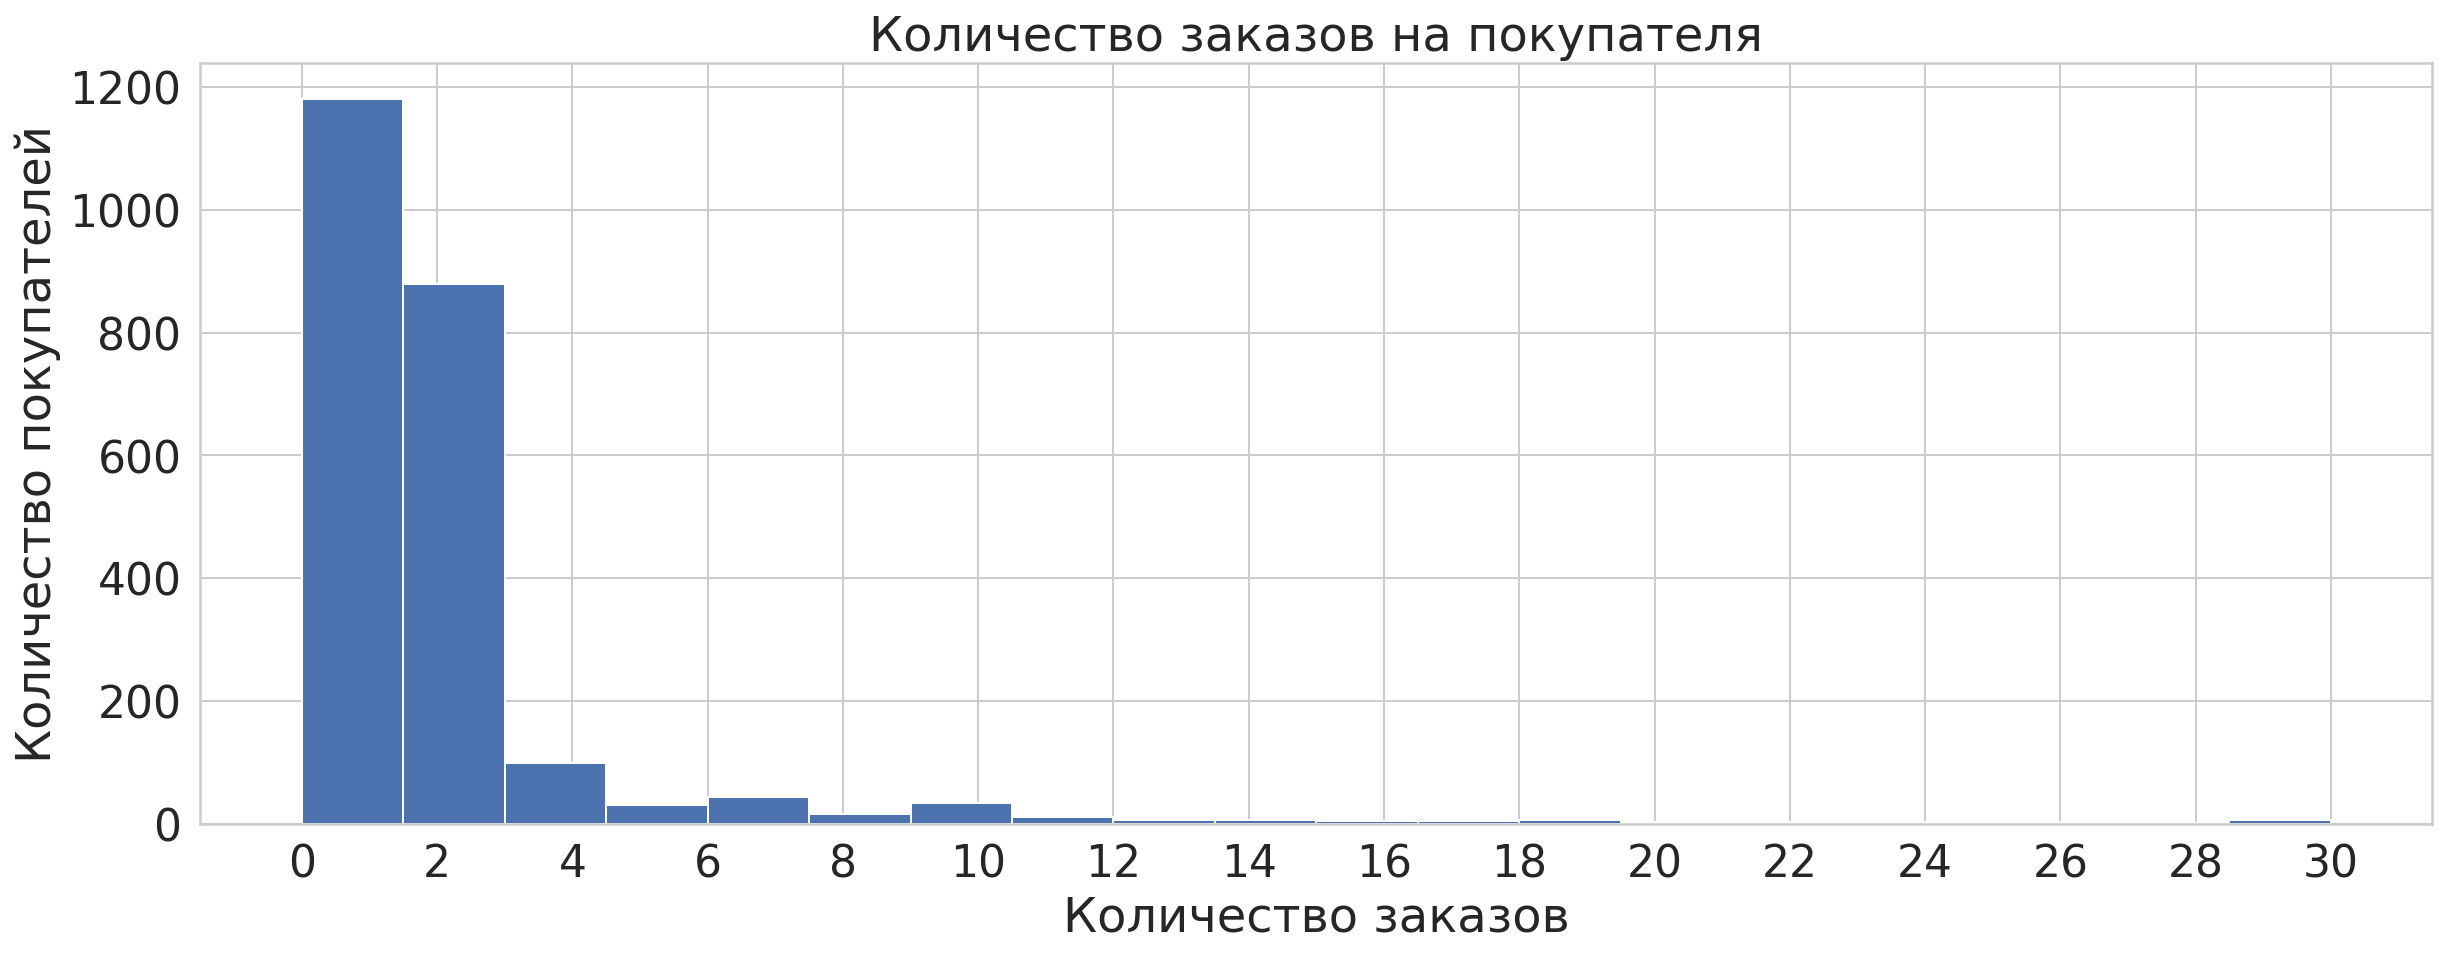

In [56]:
df.groupby('customer_id').agg({'order_id': 'count'}).hist(range=(0, 30), bins=20)
plt.title('Количество заказов на покупателя')
plt.locator_params(axis='x', nbins=30)
plt.xlabel('Количество заказов')
plt.ylabel('Количество покупателей');

Видим, что есть покупатели  у которых 1-2 заказа, это не частые клиенты. Есть покупатели у которых от 3 до 10 заказов, это частые покупатели. Есть покупатели у которых более 10 заказов, это очень частые покупатели.

**Проведем RFM-сегментацию пользователей**

Для начала вычислим недавность совершения покупки клиентом, для этого вычитаем день последней покупки клиента из последнего дня всего периода. Период с 1 октября 2018 года по 31 января 2020 года. 

In [57]:
df['Recency'] = (df['date'].dt.date.max() - df['date'].dt.date).dt.days

Далее вычисляем как часто клиент совершал заказ

In [58]:
frequency_df = df.groupby('customer_id')['order_id'].count().reset_index()
frequency_df.rename(columns={'order_id': 'Frequency'}, inplace=True) 
df = df.merge(frequency_df, on='customer_id', how='left') 

Теперь вычислим денежную стоимость покупок клиента

In [59]:
money_df = df.groupby('customer_id')['price'].sum().reset_index() 
money_df.rename(columns={'price': 'Monetary'}, inplace=True)
df = df.merge(money_df, on='customer_id', how='left')

**Расчет баллов RFM**

In [60]:
recency_scores = [3, 2, 1] 

frequency_scores = [1, 2, 3] 

money_scores = [1, 2, 3] 

df['RecencyScore'] = pd.cut(df['Recency'], bins=3, labels=recency_scores) 

df['FrequencyScore'] = pd.cut(df['Frequency'], bins=3, labels=frequency_scores) 

df['MonetaryScore'] = pd.cut(df['Monetary'], bins=3, labels=money_scores) 

df[['RecencyScore', 'FrequencyScore', 'MonetaryScore']] = df[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].astype(int)

**Расчет сегментов RFM**

In [61]:
df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore'] 
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value'] 
df['RFM_Segment'] = pd.qcut(df['RFM_Score'], q=4, labels=segment_labels, duplicates='drop')

**Сегментация клиентов**

In [62]:
df['RFM_Customer_Segment'] = ""

df.loc[(df['RFM_Score'] >= 6) & (df['RFM_Score'] <= 9), 'RFM_Customer_Segment'] = 'Очень частые покупатели' 

df.loc[(df['RFM_Score'] >= 5) & (df['RFM_Score'] < 6), 'RFM_Customer_Segment'] = 'Частые покупатели' 

df.loc[(df['RFM_Score'] >= 3) & (df['RFM_Score'] < 5), 'RFM_Customer_Segment'] = "Редкие покупатели"

### Анализ сегментов

* **Количество пользователей в каждом сегменте**

Рассмотрим сколько клиентов у магазина из каждого сегмента 

In [63]:
segment_count1 = df.groupby('RFM_Customer_Segment').agg({'customer_id': 'count'})
segment_count1

customer_id
RFM_Customer_Segment                
Очень частые покупатели          141
Редкие покупатели               4009
Частые покупатели               1262

По результату подсчета мы видим:

* редких покупателей - 4009

* частых покупателей - 1262

* очень частых покупателей - 141

**Визуализация сегментов RFM**

In [64]:
segment_counts = df['RFM_Customer_Segment'].value_counts().reset_index() 
segment_counts.columns = ['RFM_Customer_Segment', 'Count'] 

fig_segment_dist = px.bar(segment_counts, x='RFM_Customer_Segment', y='Count',  

                          color='RFM_Customer_Segment', color_discrete_sequence=px.colors.qualitative.Pastel, 

                          title='Распределение сегментов клиентов методом RFM') 

fig_segment_dist.update_layout(xaxis_title='Сегмент клиентов RFM', 

                              yaxis_title='Количество покупателей', 

                              showlegend=False) 

fig_segment_dist.show()

По итогу сегментации пользователей мы выяснили, что в интернет-магазине «Пока все ещё тут» очень много редких покупателей. В основном клиенты этого магазина делают 1-2 заказа с очень маленьким чеком.

* **Средний чек в каждом сегменте покупателей**

In [65]:
segment_check = df.groupby(['RFM_Customer_Segment']).agg({'proceeds':'sum','order_id':'count'}).reset_index()
segment_check['check'] = segment_check['proceeds'] / segment_check['order_id']
segment_check

RFM_Customer_Segment       proceeds  order_id      check
0  Очень частые покупатели   150,812.0000       141 1,069.5887
1        Редкие покупатели 2,163,535.0000      4009   539.6695
2        Частые покупатели   817,658.4167      1262   647.9068

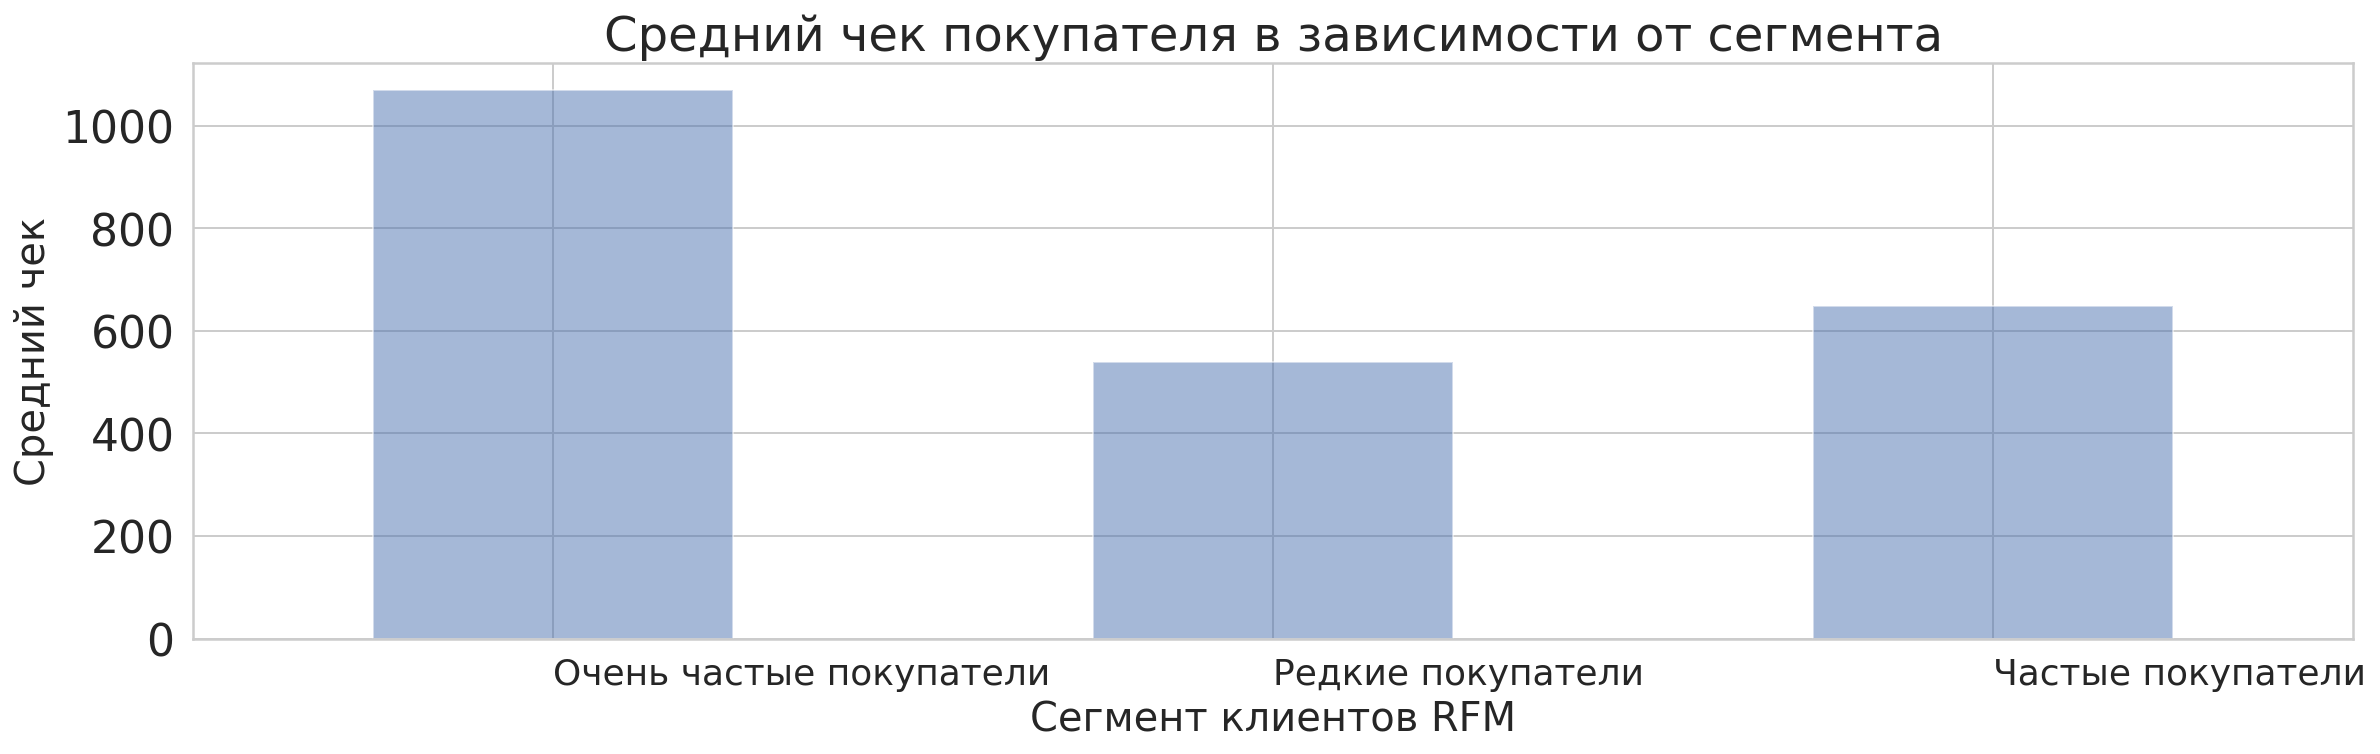

In [66]:
segment_check.plot(x='RFM_Customer_Segment', y='check', kind='bar', figsize=(15, 4), legend=False, alpha=.5)
plt.title("Средний чек покупателя в зависимости от сегмента")
plt.xlabel("Сегмент клиентов RFM", size=20)
plt.ylabel("Средний чек", size=20) 
plt.xticks(rotation=0, ha='left', size=18)
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.show()

Большой чек приносят клиенты из сегмента очень частых покупателей (1 069 у.е.), но их очень мало отностительно других сегментов. Средний чек у частых и редких покупателей довольно близкий (647 и 539 у.е.). 

* **Средняя выручка в каждом сегменте покупателей**

In [67]:
segment_proceeds = df.groupby('RFM_Customer_Segment').agg({'quantity': 'sum', 'proceeds':'sum'}).reset_index()
segment_proceeds['avg_proceeds'] = segment_proceeds['proceeds'] / segment_proceeds['quantity']
segment_proceeds

RFM_Customer_Segment  quantity       proceeds  avg_proceeds
0  Очень частые покупатели       260   150,812.0000      580.0462
1        Редкие покупатели      7247 2,163,535.0000      298.5422
2        Частые покупатели      1715   817,658.4167      476.7688

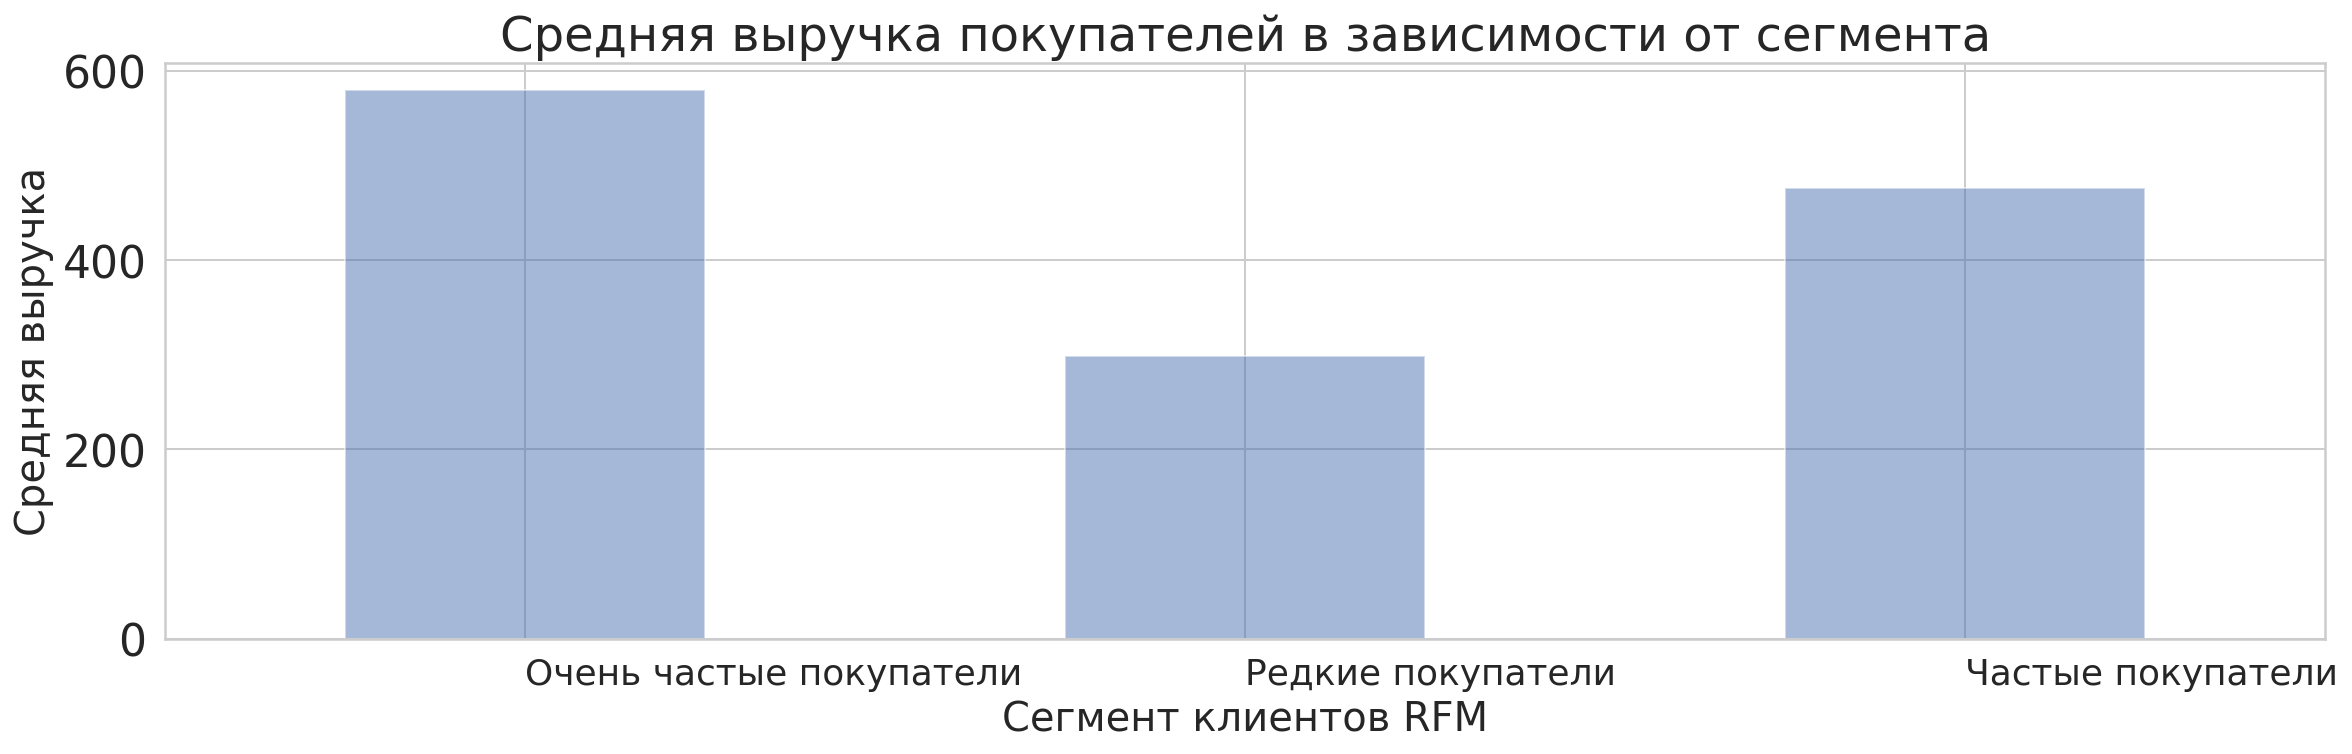

In [68]:
segment_proceeds.plot(x='RFM_Customer_Segment', y='avg_proceeds', kind='bar', figsize=(15, 4), legend=False, alpha=.5)
plt.title("Средняя выручка покупателей в зависимости от сегмента")
plt.xlabel("Сегмент клиентов RFM", size=20)
plt.ylabel("Средняя выручка", size=20) 
plt.xticks(rotation=0, ha='left', size=18)
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.show()

Средняя выручка больше у очень частых покупателей. Самая маленькая средняя выручка у редких покупателей.

* **Основная категория товаров в каждом сегменте покупателей**

Теперь посмотрим какие товары чаще покупают клиенты из разного сегмента

In [69]:
category_segment = df.pivot_table(
    index='RFM_Customer_Segment', 
    columns='product_category', 
    values='customer_id',  
    aggfunc='count',  
)
category_segment

product_category         Декор   Сад  Товары для ванны  Товары для кухни  \
RFM_Customer_Segment                                                       
Очень частые покупатели     17    45                 9                17   
Редкие покупатели          420  2095               121               637   
Частые покупатели          142   568                49               200   

product_category         Хоз.товары  
RFM_Customer_Segment                 
Очень частые покупатели          53  
Редкие покупатели               736  
Частые покупатели               303

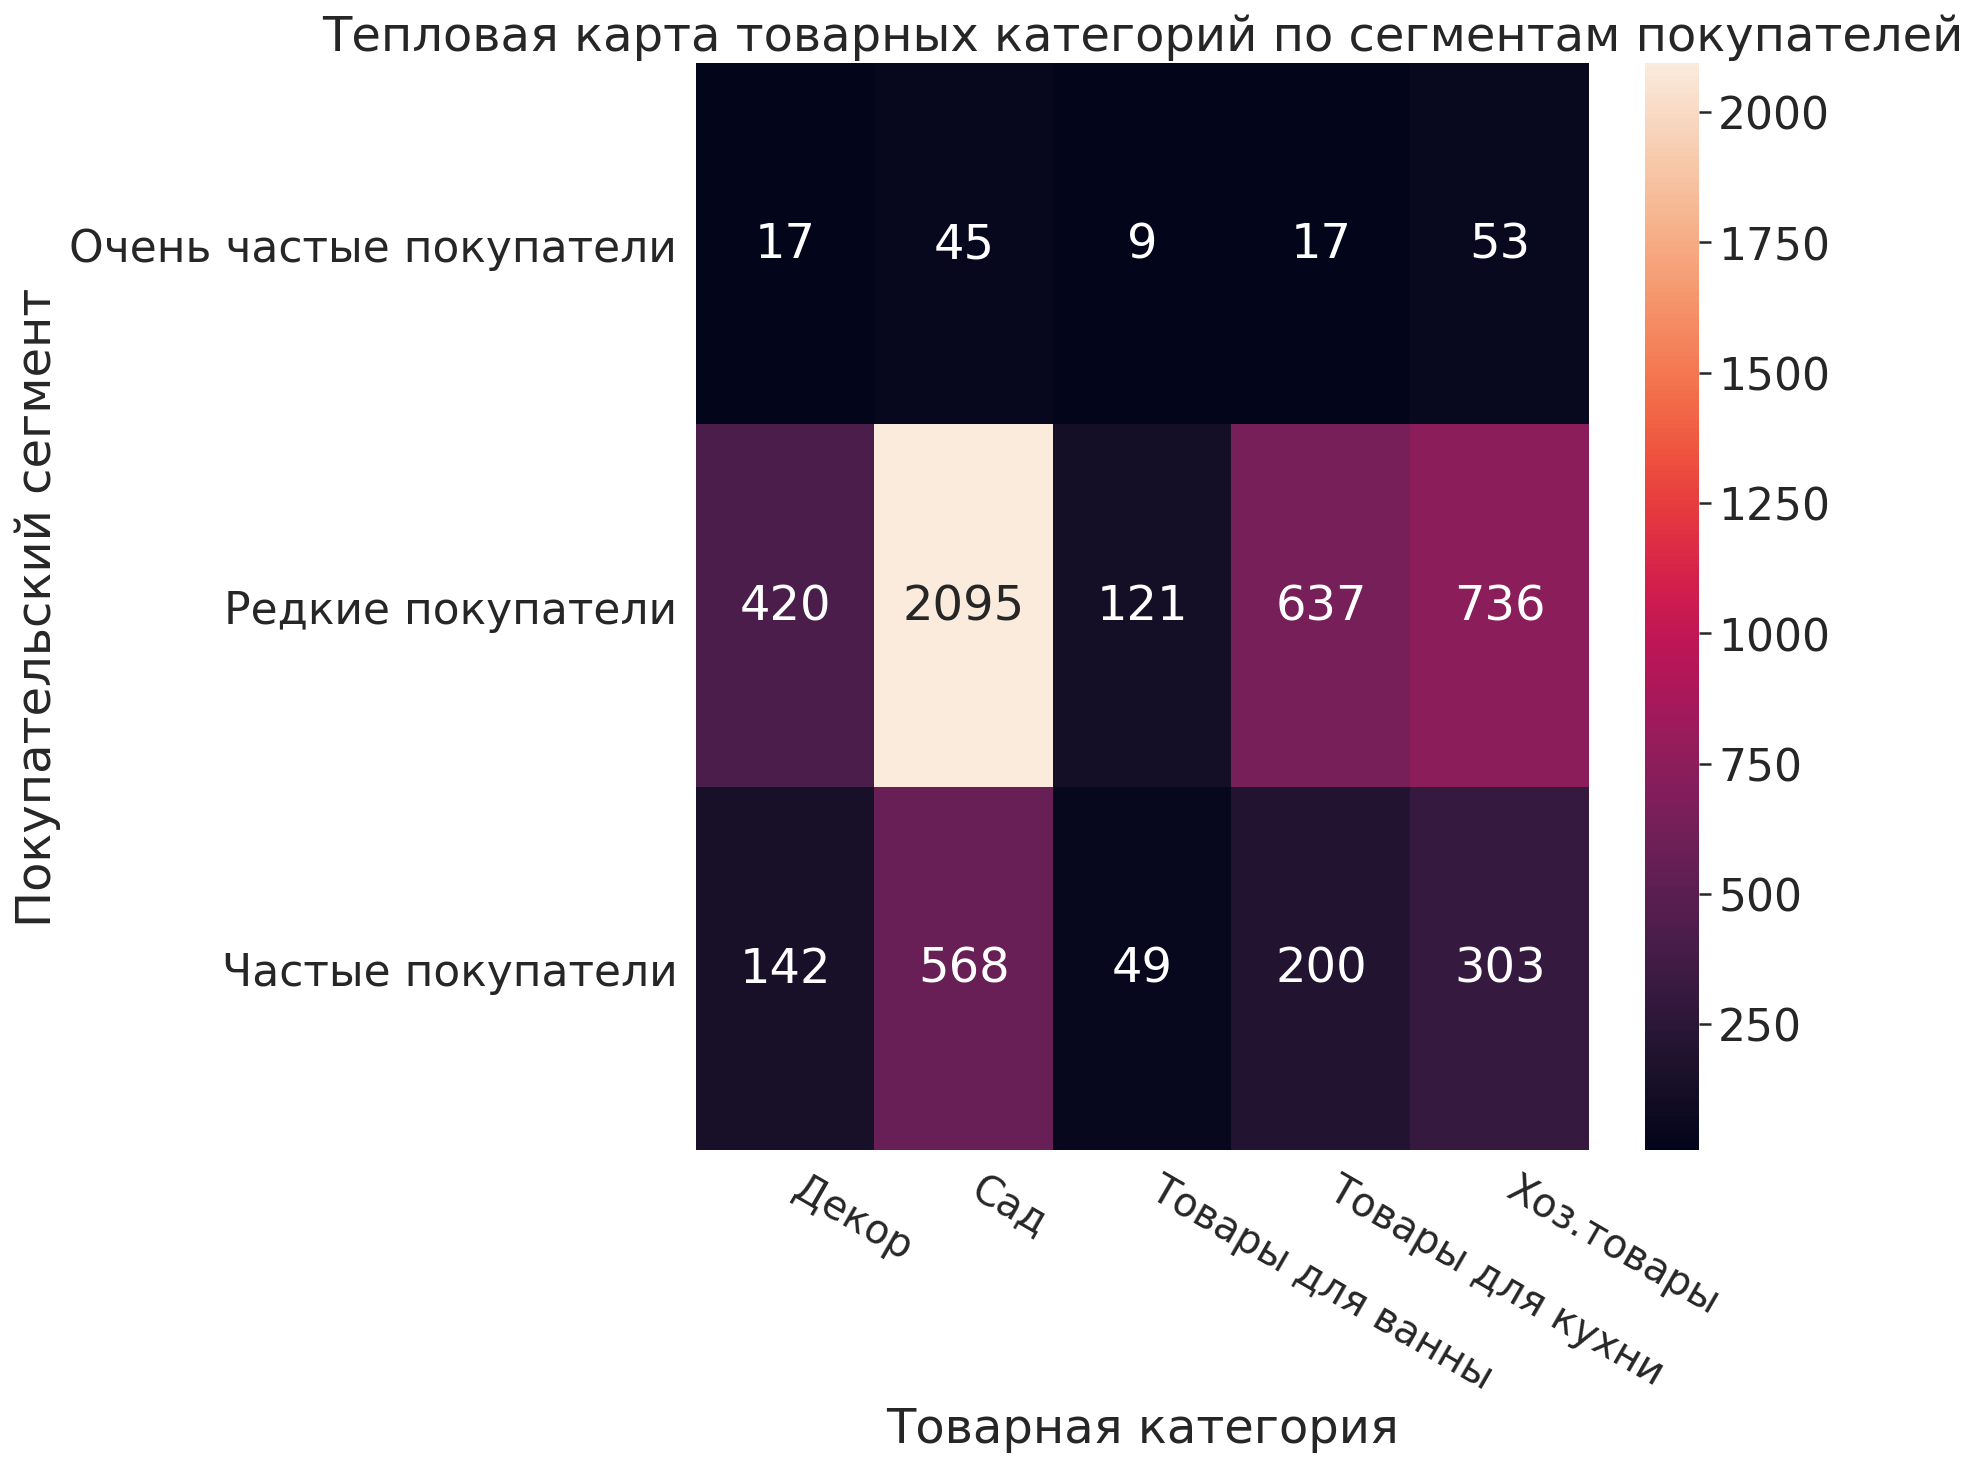

In [70]:
plt.figure(figsize=(10, 10)) # задаём размер графика
sns.heatmap(category_segment, # датафрейм с данными
            annot=True, # добавляем подписи
            fmt='') # задаём исходный формат
plt.title('Тепловая карта товарных категорий по сегментам покупателей') # название графика
plt.xlabel('Товарная категория')
plt.ylabel('Покупательский сегмент')
plt.xticks(rotation=-30, ha='left', size=20)
plt.show()

Исследуя самые продаваемые категории товаров в каждом сегменте, можно сказать:

* редкие покупатели чаще заказывают товары из категории "Сад" (2 095 товаров)

* частые покупатели чаще заказывают товары из категории "Сад" (568 товаров)

* очень частые покупатели заказывают товары из категории "Хоз.товары" (53 товара)

* **сезонность товарных категорий**

Что бы проверить сезонность товаров нужно создать столбец с временем года.

In [71]:
def season_func(x):
    if '-01' in x or '02' in x or '12' in x: 
        return 'зима'
    elif '03' in x or '04' in x or '05' in x: 
        return 'весна'
    elif '06' in x or '07' in x or '08' in x:
        return 'лето'
    else:
        return 'осень'
    
df['season'] = df['month'].apply(season_func)

Построим график числа покупателей в разное время года

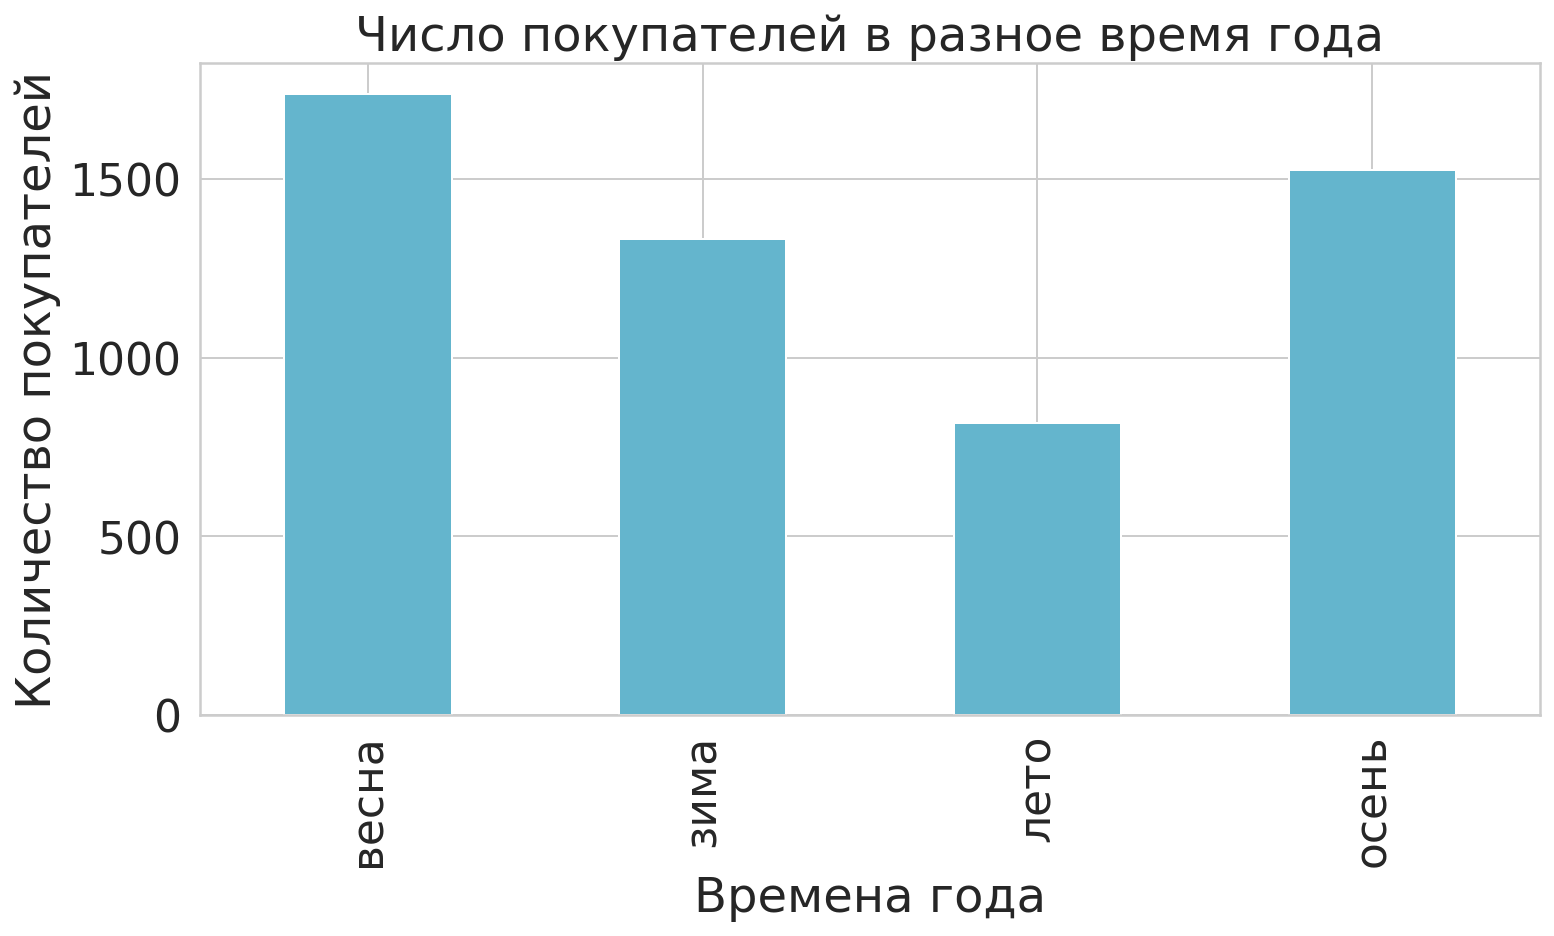

In [72]:
df.groupby('season').agg(
    {'customer_id':'count'}).plot(kind='bar', figsize=(12, 6), color='C9', legend=False)
plt.title('Число покупателей в разное время года')
plt.xlabel('Времена года')
plt.ylabel('Количество покупателей')
plt.show()

Общая картина говорит о том, что больше всего покупателей весной и осенью. Меньше всего летом.

Теперь рассмотрим сезонность категорий товаров.

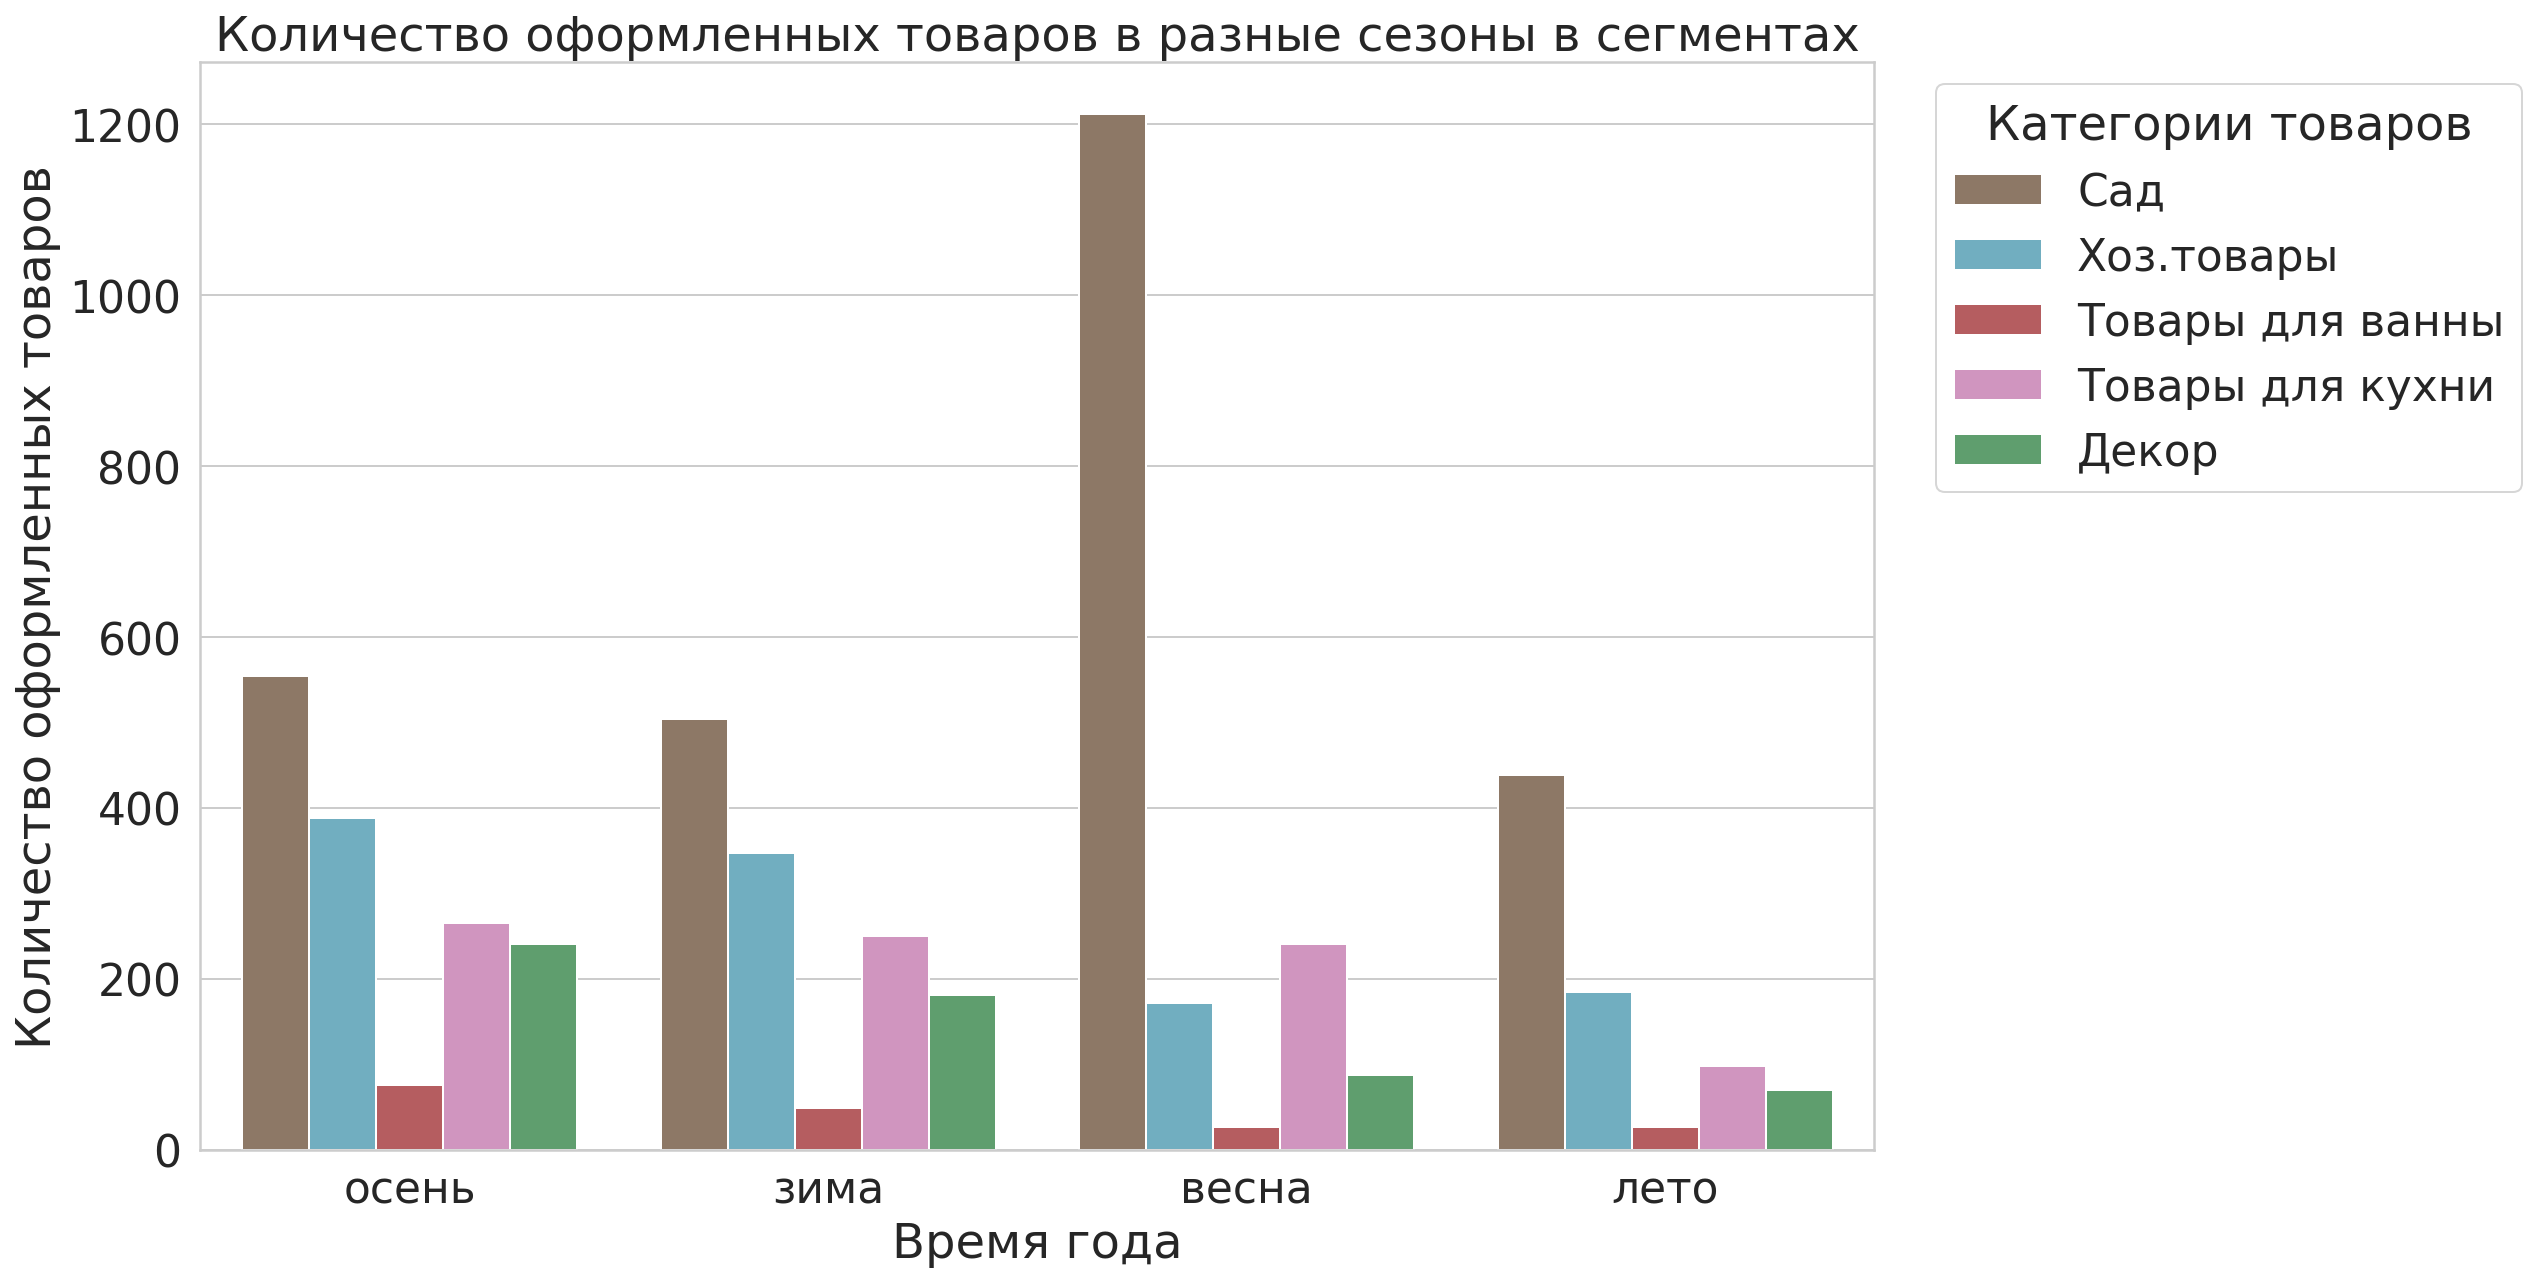

In [73]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='season', hue='product_category', palette=['C5', 'C9', 'C3', 'C6', 'C2'])
plt.title('Количество оформленных товаров в разные сезоны в сегментах')
plt.xlabel('Время года')
plt.ylabel('Количество оформленных товаров')
plt.legend(title='Категории товаров', bbox_to_anchor=(1.4, 1.0))
plt.show()

На графике видно:

Во всех временах года лидируют товары их категории "Сад". Самый большой спрос на эту категорию весной, потому что в это время года клиенты готовятся к летнему сезону. меньший спрос на эту категорию летом, так как покупатели не хотят ждать заказ и идут за товаром в оффлайн магазины.

**Выделим только редких покупателей и рассмотрим сезонность категорий товаров**

In [74]:
df_segment1 = df[df['RFM_Customer_Segment'] == 'Редкие покупатели']

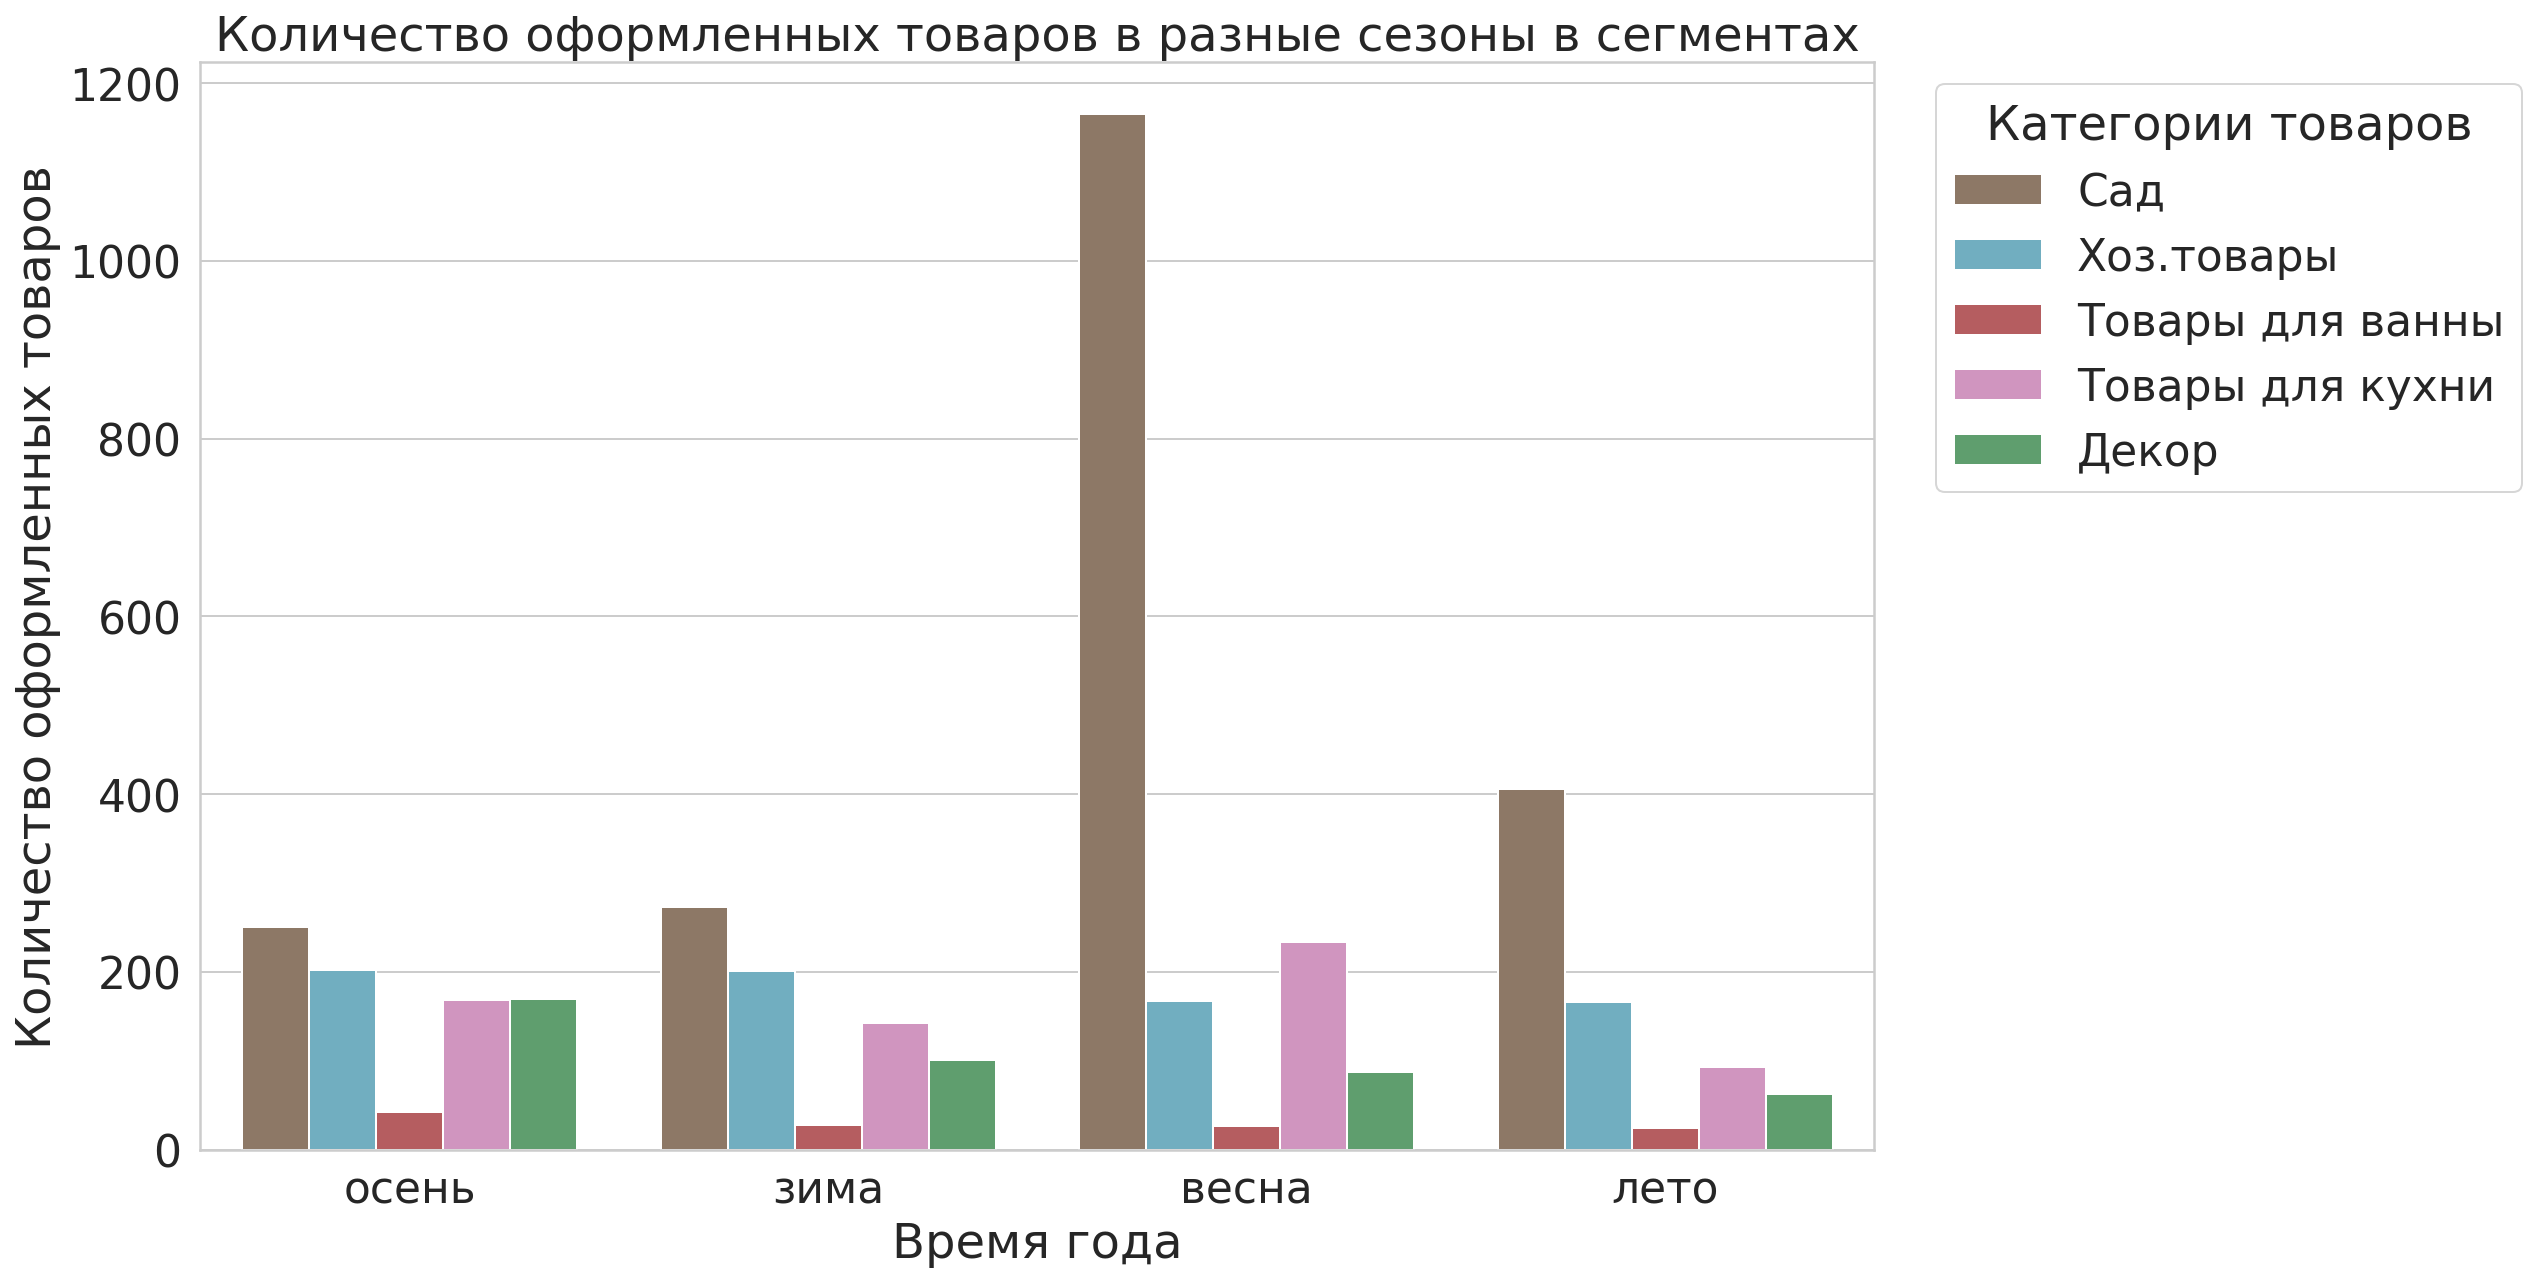

In [75]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df_segment1, x='season', hue='product_category', palette=['C5', 'C9', 'C3', 'C6', 'C2'])
plt.title('Количество оформленных товаров в разные сезоны в сегментах')
plt.xlabel('Время года')
plt.ylabel('Количество оформленных товаров')
plt.legend(title='Категории товаров', bbox_to_anchor=(1.4, 1.0))
plt.show()

Редкие покупатели много заказывают весной из категории "Сад". В остальное время года покупки из разных категорий очень маленькие.

**Выделим только частых покупателей и рассмотрим сезонность категорий товаров**

In [76]:
df_segment2 = df[df['RFM_Customer_Segment'] == 'Частые покупатели']

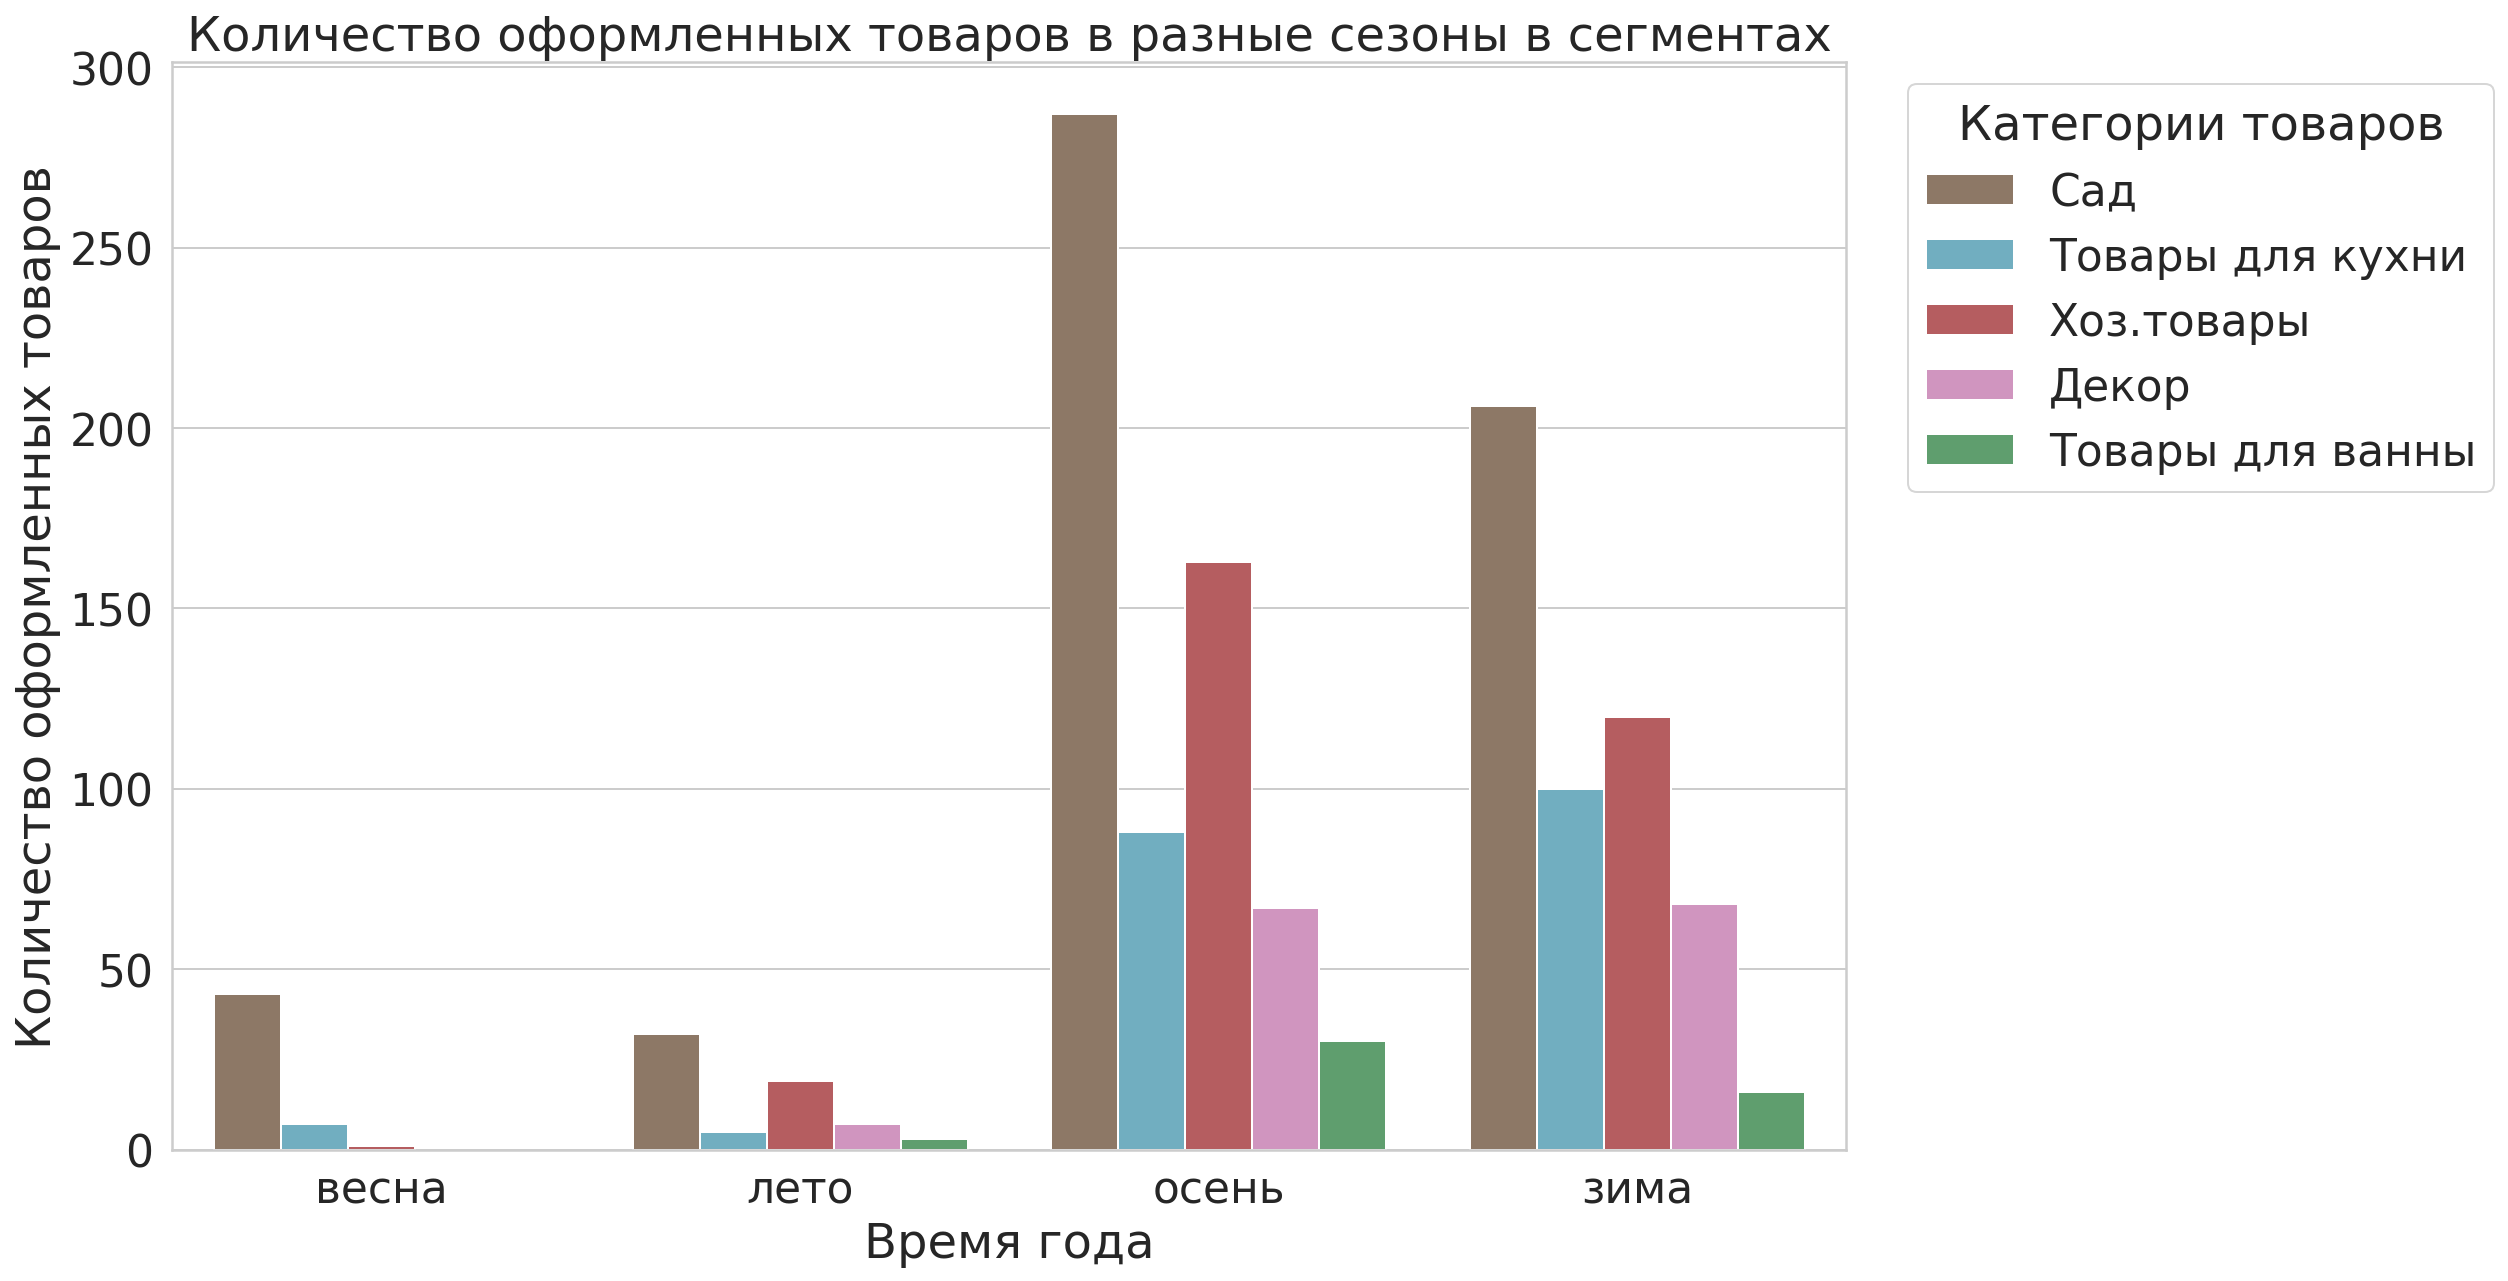

In [77]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df_segment2, x='season', hue='product_category', palette=['C5', 'C9', 'C3', 'C6', 'C2'])
plt.title('Количество оформленных товаров в разные сезоны в сегментах')
plt.xlabel('Время года')
plt.ylabel('Количество оформленных товаров')
plt.legend(title='Категории товаров', bbox_to_anchor=(1.4, 1.0))
plt.show()

У частых покупателй видим большой спрос на товары "Сад" осенью и зимой, так же осенью и зимой они чаще покупают и другие товары из разных категорий.

**Выделим только очень частых покупателей и рассмотрим сезонность категорий товаров**

In [78]:
df_segment3 = df[df['RFM_Customer_Segment'] == 'Очень частые покупатели']

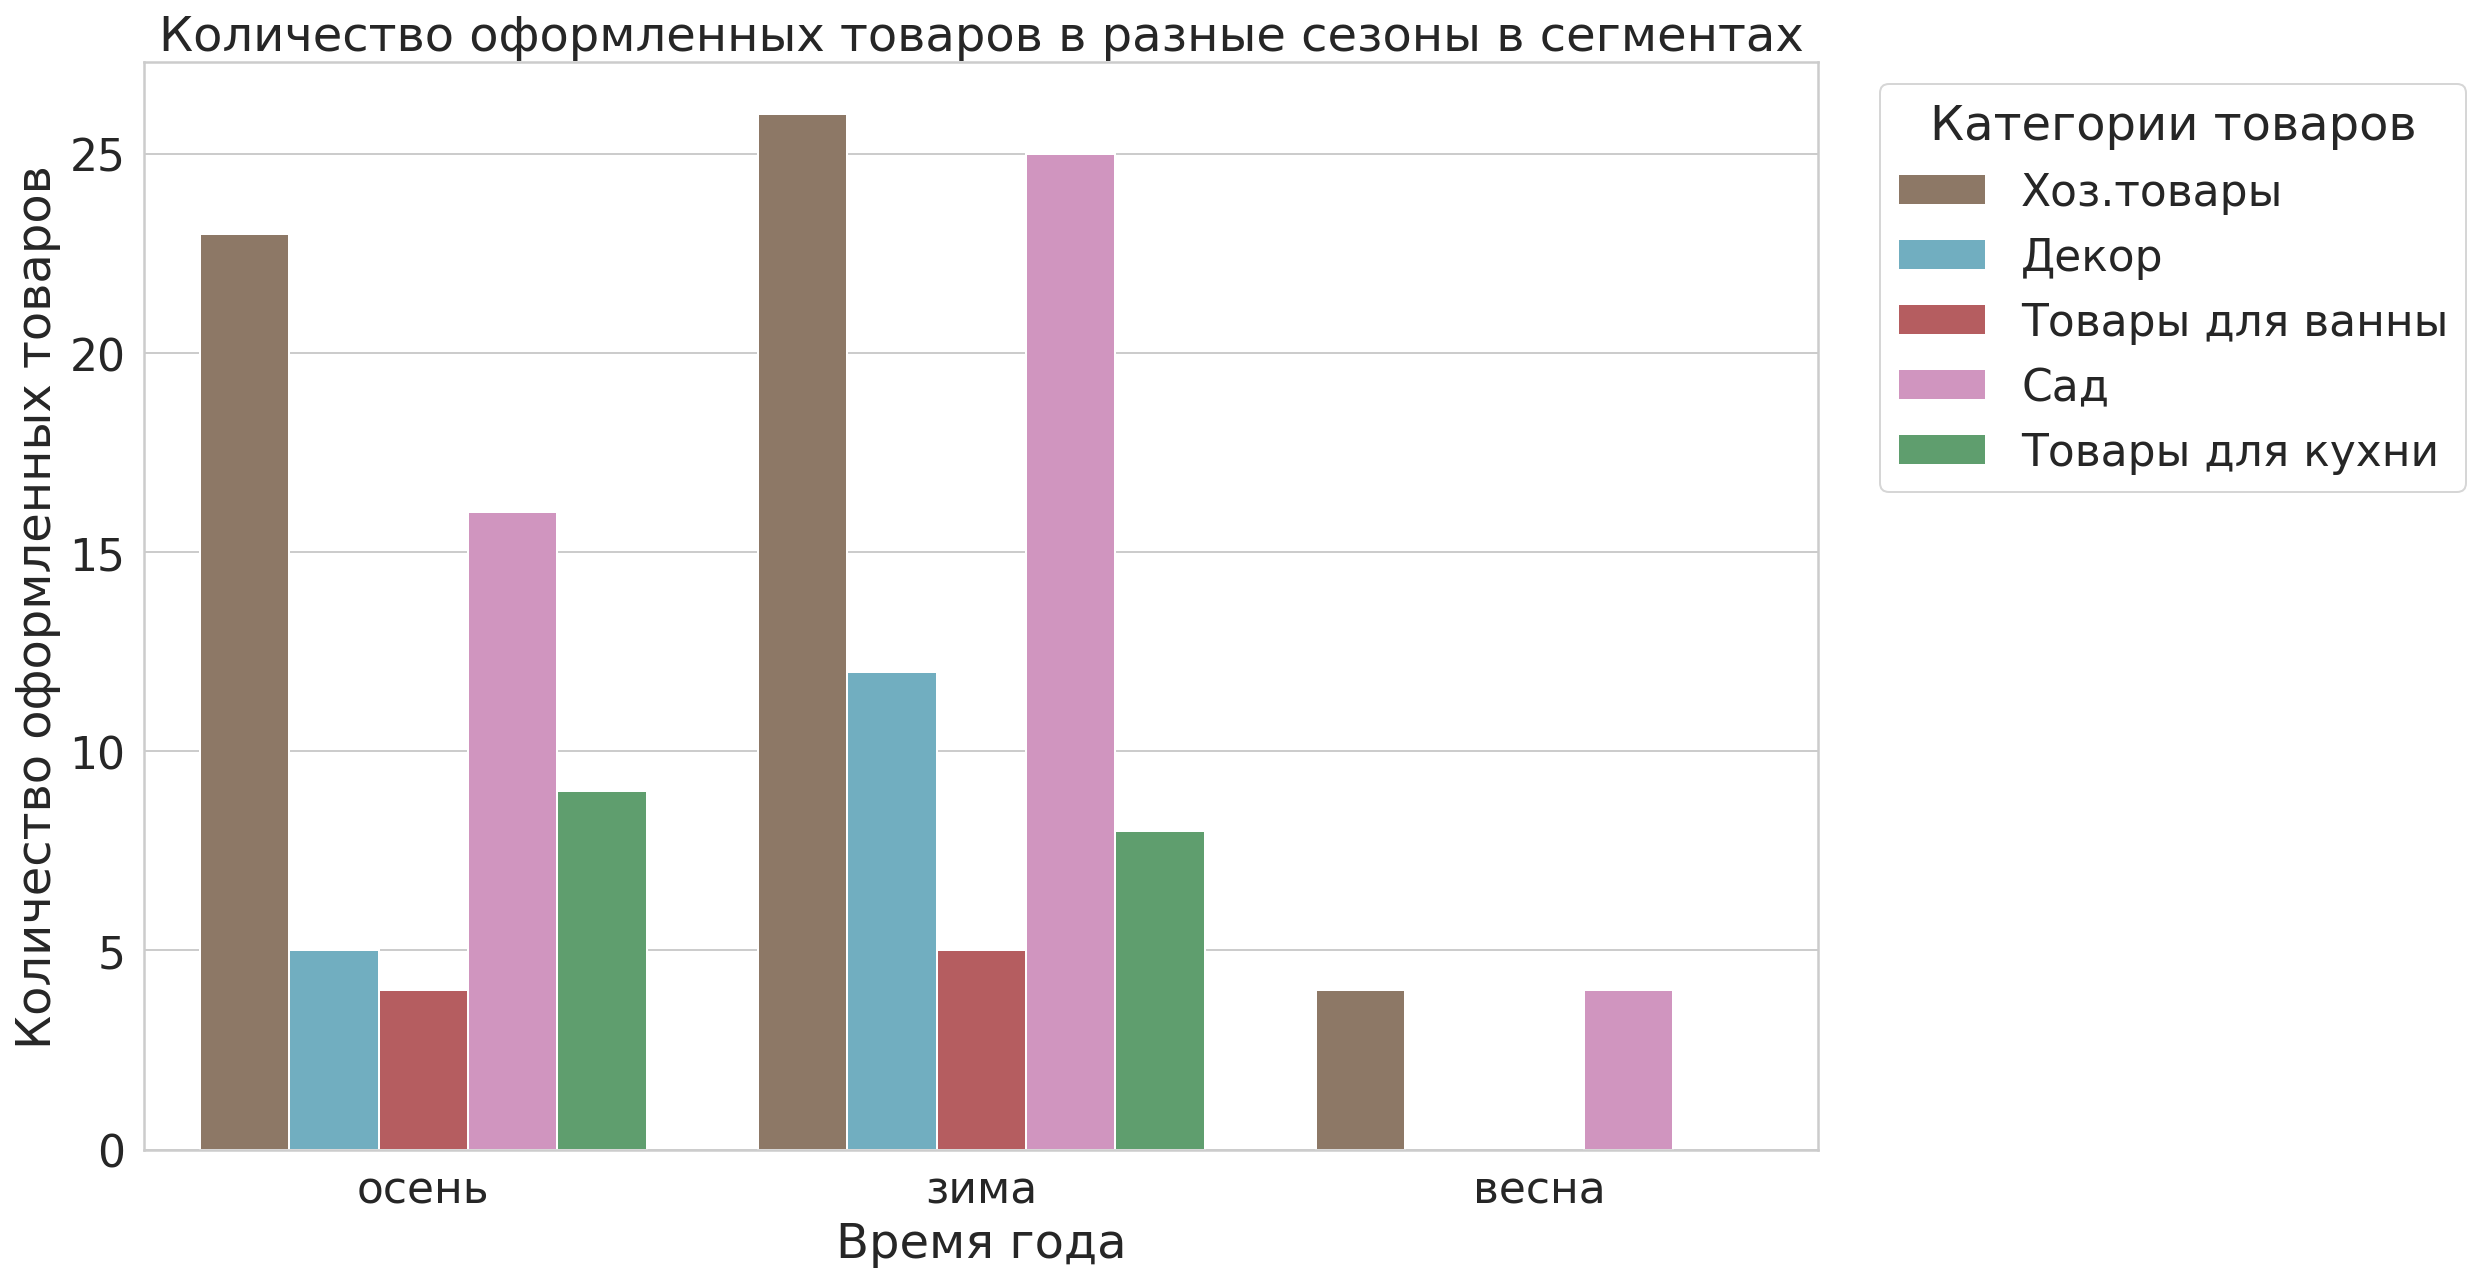

In [79]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df_segment3, x='season', hue='product_category', palette=['C5', 'C9', 'C3', 'C6', 'C2'])
plt.title('Количество оформленных товаров в разные сезоны в сегментах')
plt.xlabel('Время года')
plt.ylabel('Количество оформленных товаров')
plt.legend(title='Категории товаров', bbox_to_anchor=(1.4, 1.0))
plt.show()

В случае очень частых покупателей мы видим, что у них совсем нет заказов летом. Осенью и зимой они любят заказывать товары из категории "Хоз.товары" и "Сад". Весной интерес к покупкам падает.

**Вывод**

Во время категоризации мы выделили 5 основных категорий товаров:

* Сад

* Хоз.товары

* Товары для кухни

* Декор

* товары для ванны

Наибольшее количество товаров в магазине оказалось в разделе "Сад" и "Хоз.товары". Значит интернет-магазин в основном специализируется на товарах для дачи, сада и дома. 

После сегментации покупателей было выявлено 3 типа клиентов:

1) редкие покупатели

2) частые покупатели

3) очень частые покупатели

На основе результата сегментации был проведен анализ и выяснено:

- Самое большое количество покупателей в сегменте "редкие покупатели". самое маленькое количество покупателей в сегменте "очень частые покупатели". Выходит в магазине преобладают редкие заказы. Значит есть проблема, почему покупатели не возвращаются за покупками.

- Прибыльный чек в сегменте "очень частые покупатели", но их очень мало у магазина, что тоже сказывается на выручке в целом. Средний чек у остальных сегментов очень близкий.

- Средняя выручка больше у очень частых покупателей, самая маленькая средняя выручка у редких покупателей.

- Востребованная категория "Сад" у "редких покупателей" и "частых покупателей". Категория "Хоз.товары" интересна для "очень частых покупателей".

- Исследуя сезонность категорий товаров в разрезе сегментов покупателей мы выяснили:

1) у редких покупателей лидируют покупки весной из категории "Сад"

2) у частых покупателей лидируют покупки осенью и зимой из категории "Сад"

3) у очень частых покупателей лидируют покупки осенью и зимой из категории "Хоз.товары"

## Проверка гипотез

###  Посчитаем статистическую значимость различий в выручке между сегментами

**Нулевая гипотеза:** различий нет в выручке между сегментами покупателей.

**Альтернативная гипотеза:** различия есть в выручке между сегментами покупателей.

Перед проведением теста проверим равны ли дисперсии выборок.

In [80]:
cluster0 = df[df['RFM_Customer_Segment'] == 'Очень частые покупатели']
cluster1 = df[df['RFM_Customer_Segment'] == 'Редкие покупатели']
cluster2 = df[df['RFM_Customer_Segment'] == 'Частые покупатели']

In [81]:
sam_rev_0 = cluster0['proceeds']
sam_rev_1 = cluster1['proceeds']
sam_rev_2 = cluster2['proceeds']

In [82]:
print('Дисперсия выручки 0-го кластера: {}'.format(np.var(sam_rev_0, ddof=1)))
print('Дисперсия выручки 1-го кластера: {}'.format(np.var(sam_rev_1, ddof=1)))
print('Дисперсия выручки 2-го кластера: {}'.format(np.var(sam_rev_2, ddof=1)))
print('Соотношение дисперсий 0/1: {}'.format((np.var(sam_rev_1, ddof=1))/(np.var(sam_rev_0, ddof=1))))
print('Соотношение дисперсий 0/2: {}'.format((np.var(sam_rev_2, ddof=1))/(np.var(sam_rev_0, ddof=1))))
print('Соотношение дисперсий 1/2: {}'.format((np.var(sam_rev_2, ddof=1))/(np.var(sam_rev_1, ddof=1))))

Дисперсия выручки 0-го кластера: 1330714.0010131712
Дисперсия выручки 1-го кластера: 671482.2073550579
Дисперсия выручки 2-го кластера: 943739.2301932335
Соотношение дисперсий 0/1: 0.5046029476234629
Соотношение дисперсий 0/2: 0.7091976408715133
Соотношение дисперсий 1/2: 1.4054567937259057


Соотношение дисперсий не высокое, при проведении теста можно не учитывать параметр equal_var.

**Проверка сегментов 'Очень частые покупатели' и 'Редкие покупатели'**

In [83]:
m = 3 #число тестов
alpha = 0.05 #исходный уровень значимости

#считаем поправку 
alpha_bonf = alpha / m

results = st.ttest_ind(sam_rev_0, sam_rev_1)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha_bonf:
    print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать выборки разными')

p-значение:  1.3576302684578752e-13
Отвергаем нулевую гипотезу: между выборками есть значимая разница


**Проверка сегментов 'Очень частые покупатели' и 'Частые покупатели'**

In [84]:
m = 3 #число тестов
alpha = 0.05 #исходный уровень значимости

#считаем поправку 
alpha_bonf = alpha / m

results = st.ttest_ind(sam_rev_0, sam_rev_2)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha_bonf:
    print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать выборки разными')

p-значение:  1.833607406295139e-06
Отвергаем нулевую гипотезу: между выборками есть значимая разница


**Проверка сегментов 'Редкие покупатели' и 'Частые покупатели'**

In [85]:
m = 3 #число тестов
alpha = 0.05 #исходный уровень значимости

#считаем поправку 
alpha_bonf = alpha / m

results = st.ttest_ind(sam_rev_1, sam_rev_2)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha_bonf:
    print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать выборки разными')

p-значение:  9.459445249230496e-05
Отвергаем нулевую гипотезу: между выборками есть значимая разница


Во всех проверках нулевая гипотеза была отвергнута и между всеми выборками есть значимая разница в выручке.

###  Посчитаем статистическую значимость различий в среднем чеке между сегментами

**Нулевая гипотеза:** различий нет в среднем чеке между сегментами покупателей.

**Альтернативная гипотеза:** различия есть в среднем чеке между сегментами покупателей.


**Проверка сегментов 'Очень частые покупатели' и 'Редкие покупатели'**

In [86]:
m = 3 #число тестов
alpha = 0.05 #исходный уровень значимости

#считаем поправку 
alpha_bonf = alpha / m

print('Относительное изменение среднего чека в сегменте "Очень частые покупатели" по отношению к сегменту "Редкие покупатели": {:.3f}'.format(
df[df['RFM_Customer_Segment']=='Очень частые покупатели']['proceeds'].mean()/df[df['RFM_Customer_Segment']=='Редкие покупатели']['proceeds'].mean()-1))
results = st.mannwhitneyu(df[df['RFM_Customer_Segment']=='Редкие покупатели']['proceeds'], df[df['RFM_Customer_Segment']=='Очень частые покупатели']['proceeds'])
print('P-value: {}'.format(results.pvalue))

if results.pvalue < alpha_bonf:
    print('В средних чеках в сегментах "Очень частые покупатели" и "Редкие покупатели" различия есть')
else:
    print('В средних чеках в сегментах "Очень частые покупатели" и "Редкие покупатели" различий нет')

Относительное изменение среднего чека в сегменте "Очень частые покупатели" по отношению к сегменту "Редкие покупатели": 0.982
P-value: 9.767543775081763e-16
В средних чеках в сегментах "Очень частые покупатели" и "Редкие покупатели" различия есть


**Проверка сегментов 'Очень частые покупатели' и 'Частые покупатели'**

In [87]:
m = 3 #число тестов
alpha = 0.05 #исходный уровень значимости

#считаем поправку 
alpha_bonf = alpha / m

print('Относительное изменение среднего чека в сегменте "Очень частые покупатели" по отношению к сегменту "Частые покупатели": {:.3f}'.format(
df[df['RFM_Customer_Segment']=='Очень частые покупатели']['proceeds'].mean()/df[df['RFM_Customer_Segment']=='Частые покупатели']['proceeds'].mean()-1))
results = st.mannwhitneyu(df[df['RFM_Customer_Segment']=='Частые покупатели']['proceeds'], df[df['RFM_Customer_Segment']=='Очень частые покупатели']['proceeds'])
print('P-value: {}'.format(results.pvalue))

if results.pvalue < alpha_bonf:
    print('В средних чеках в сегментах "Очень частые покупатели" и "Частые покупатели" различия есть')
else:
    print('В средних чеках в сегментах "Очень частые покупатели" и "Частые покупатели" различий нет')

Относительное изменение среднего чека в сегменте "Очень частые покупатели" по отношению к сегменту "Частые покупатели": 0.651
P-value: 2.197892396368373e-11
В средних чеках в сегментах "Очень частые покупатели" и "Частые покупатели" различия есть


**Проверка сегментов 'Редкие покупатели' и 'Частые покупатели'**

In [88]:
m = 3 #число тестов
alpha = 0.05 #исходный уровень значимости

#считаем поправку 
alpha_bonf = alpha / m

print('Относительное изменение среднего чека в сегменте "Редкие покупатели" по отношению к сегменту "Частые покупатели": {:.3f}'.format(
df[df['RFM_Customer_Segment']=='Редкие покупатели']['proceeds'].mean()/df[df['RFM_Customer_Segment']=='Частые покупатели']['proceeds'].mean()-1))
results = st.mannwhitneyu(df[df['RFM_Customer_Segment']=='Частые покупатели']['proceeds'], df[df['RFM_Customer_Segment']=='Редкие покупатели']['proceeds'])
print('P-value: {}'.format(results.pvalue))

if results.pvalue < alpha_bonf:
    print('В средних чеках в сегментах "Редкие покупатели" и "Частые покупатели" различия есть')
else:
    print('В средних чеках в сегментах "Редкие покупатели" и "Частые покупатели" различий нет')

Относительное изменение среднего чека в сегменте "Редкие покупатели" по отношению к сегменту "Частые покупатели": -0.167
P-value: 0.18775009698863987
В средних чеках в сегментах "Редкие покупатели" и "Частые покупатели" различий нет


Нулевая гипотеза была отвергнута между сегментами 'Очень частые покупатели' и 'Редкие покупатели', а также между 'Очень частые покупатели' и 'Частые покупатели'. Значит между этими сегментами есть значимая разница в среднем чеке. Только между сегментами 'Редкие покупатели' и 'Частые покупатели' нет значимой разницы в среднем чеке. 

**Вывод** 

В ходе проверки гипотез практически везде есть значимая разница в сегментах покупателей. Так же можно сказать, что разбиение на группы работает корректно.

# Общий вывод

Данное исследование было сделано для разработки рекомендаций по персонализации предложений для покупателей, основанные на анализе пользовательского опыта и сегментации потребителей интернет-магазина «Пока все ещё тут». 

В ходе работы были получены следующие результаты:

За период с 1 октября 2018 г. по 31 января 2020 г. 2 413 клиентов совершило 3 492 заказа. В каталоге интернет-магазина содержится 2 332 уникальных товара по стоимости от 9 до 14 917 у.е. Минимальное количество товаров в заказе - 1, максимальное - 1 000.Самый часто покупаемый товар - "пеларгония розебудная red pandora укорененный черенок", его купили 65 ра.

При покупки 1 товара, выручка составляла - 1 769 954,50 у.е., средняя выручка была - 1 179,18 у.е. Когда покупали 2 или более товаров, выручка была - 1 813 722,91 у.е., средняя выручка при этом - 2 087,13 у.е.

Самым прибыльным месяцем оказался октябрь 2018 года(314 456,00 у.е.), самый убыточный месяц - ноябрь 2019 года (102 076,75 у.е.). 

Весь продаваемый ассортимент товаров был разделен на 5 категорий:

* Сад

* Хоз.товары

* Товары для кухни

* Декор

* Товары для ванны

После сегментации покупателей было выявлено 3 типа клиентов:

1) редкие покупатели

2) частые покупатели

3) очень частые покупатели

На основе результата сегментации был проведен анализ и выяснено:

- Самое большое количество покупателей в сегменте "редкие покупатели". самое маленькое количество покупателей в сегменте "очень частые покупатели". Выходит в магазине преобладают редкие заказы. Значит есть проблема, почему покупатели не возвращаются за покупками.

- Прибыльный чек в сегменте "очень частые покупатели", но их очень мало у магазина, что тоже сказывается на выручке в целом. Средний чек у остальных сегментов очень близкий.

- Средняя выручка больше у очень частых покупателей, самая маленькая средняя выручка у редких покупателей.

- Востребованная категория "Сад" у "редких покупателей" и "частых покупателей". Категория "Хоз.товары" интересна для "очень частых покупателей".

- Исследуя сезонность категорий товаров в разрезе сегментов покупателей мы выяснили:

1) у редких покупателей лидируют покупки весной из категории "Сад"

2) у частых покупателей лидируют покупки осенью и зимой из категории "Сад"

3) у очень частых покупателей лидируют покупки осенью и зимой из категории "Хоз.товары"

Так же можно сказать о сегментах покупателей:

В основном интернет-магазин имеет **редких покупателей**, со средним чеком и большим спросом на товары из категории "Сад". Возможно эти клиенты закупаются так редко перед дачным сезоном, а не круглый год.

**Частые покупатели** совершают заказы чаще редких покупателей, но средний чек у них немного больше предыдущей группы. Они так же больше интересуются товарами категории "Сад". Возможно эти клиенты в течение года любят покупать товары из этой категории.

Меньше всего **очень частых покупателей** у магазина. При этом эти клиенты имеют очень высокий средний чек и больше покупают товаров из категории "Хоз.товары". Так как эта категория актуальна круглый год, поэтому за этими товарами возвращаются регулярно.

Далее была проведена проверка гипотез:

1) Расчет статистической значимости различий в выручке между сегментами

В результате тест показал значимую разницу между всеми сегментами покупателей в выручке

2) Расчет статистической значимости различий в среднем чеке между сегментами

В результате тест показал значимую разницу в среднем чеке между  "'Очень частые покупатели' и 'Редкие покупатели'" и  "'Очень частые покупатели' и 'Частые покупатели'". Тест показал, что нет различий в среднем чеке между "'Редкие покупатели' и 'Частые покупатели'".

*Рекомендации:* 

* для **редких покупателей** желательно рассылать рекламные предложения в осенний и зимний период о товарах из категории "Хоз.товары", "Декор" и "Товары для кухни".

* для **частых покупателей** можно разработать похожие рекламные предложения как и для редких покупателей только уже в весенний и летний период.

* для **очень частых покупателей** рекомендовано рассылать предложения о товарах из категории "Сад", "Декор", "Товары для кухни", "Хоз.товары" в весенний и летний период. 

* так же рекомендовано рассылать рекламные предложения о товарах из категории "Товары для ванны" всем сегментам покупателей круглый год, так как именно эти товары отстают в продажах.
 